# 스프린트 DA 5기 2팀 성유창 eda 및 분석

In [425]:
import pandas as pd
import os
import datetime as dt
pd.set_option('display.max_columns',100)
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib as mpl
pd.set_option('display.max_colwidth', None)
import glob
import scipy.stats as stats
palette = ['#b3cde0', '#7e79b8', '#eac4d5', '#6e58a7', '#c6e2e9',
            '#a9a7cf', '#9dc3c1','#d5d5e9', '#baaad0', '#f8c8dc', '#c5b9f2']  

sns.set_palette(palette)
from scipy.stats import chi2_contingency

## 전처리

### enter_lesson_page

#### 기본 전처리 ()

In [3]:
enter_lesson_page = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/enter_lesson_page-001.csv')

C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\2524196629.py:1: DtypeWarning: Columns (9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  enter_lesson_page = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/enter_lesson_page-001.csv')


In [4]:
# 시간. UTC -> KST
enter_lesson_page['client_event_time'] = pd.to_datetime(enter_lesson_page['client_event_time'], errors='coerce')
enter_lesson_page['client_event_time'] = enter_lesson_page['client_event_time'] + pd.Timedelta(hours=9)

In [5]:
# 2022, 2023년 제한
enter_lesson_page = enter_lesson_page.loc[
    enter_lesson_page['client_event_time'].dt.year.between(2022, 2023)]

In [6]:
# 컬럼명 변경
enter_lesson_page.rename(columns={'content.id': 'content_id', 'lesson.id': 'lesson_id'}, inplace=True)
enter_lesson_page.rename(columns={'client_event_time': 'enter_lesson_time'}, inplace=True)

# 컬럼 버리기
enter_lesson_page.drop(columns=['platform', 'os_version', 'device_carrier'], inplace=True)
enter_lesson_page.drop(enter_lesson_page[enter_lesson_page['os_name'] == 'Chrome Headless'].index, inplace=True)

In [7]:
# 중복 컬럼 삭제
enter_lesson_page.duplicated(subset=['enter_lesson_time', 'user_id', 'content_id', 'lesson_id'], keep=False)

0           False
1           False
2           False
3           False
4           False
            ...  
21029702    False
21029703    False
21029704    False
21029705    False
21029706    False
Length: 21028196, dtype: bool

In [8]:
enter_lesson_page.head()

,city,enter_lesson_time,country,device_family,device_type,event_type,language,os_name,user_id,content_id,is_trial,lesson_id,is_free_trial
0,Wonju,2023-04-06 06:46:04.333,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
1,Wonju,2023-04-06 06:55:50.787,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
2,Wonju,2023-04-06 06:55:55.684,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN
3,Dongdaemun-gu,2023-04-06 06:04:55.828,South Korea,Mac,Mac,enter.lesson_page,Korean,Chrome,b2b31f00b82edc6419b25324a7ae41a4,5fc64d786416b980cfda86afd69e4516,False,68cc362ca81b5899b3c9b4dea0aaddff,NaN
4,Dongdaemun-gu,2023-04-06 06:05:34.139,South Korea,Mac,Mac,enter.lesson_page,Korean,Chrome,b2b31f00b82edc6419b25324a7ae41a4,db43a841c994231e2795d4df8931af50,False,144682f4648f81de8e6aabd11b92105e,NaN


### complete_lesson

#### 기본 전처리

In [9]:
complete_lesson = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/complete_lesson.csv')

In [10]:
# 시간. UTC -> KST
complete_lesson['client_event_time'] = pd.to_datetime(complete_lesson['client_event_time'], errors='coerce')
complete_lesson['client_event_time'] = complete_lesson['client_event_time'] + pd.Timedelta(hours=9)

In [11]:
# 2022, 2023년 제한
# complete_lesson = complete_lesson[(complete_lesson['client_event_time'] >= start_date) & (complete_lesson['client_event_time'] <= end_date)]
# 시간 필터링
complete_lesson = complete_lesson.loc[
    complete_lesson['client_event_time'].dt.year.between(2022, 2023)]

In [12]:
# 컬럼명 변경
complete_lesson.rename(columns={'content.id': 'content_id', 'lesson.id': 'lesson_id'}, inplace=True)
complete_lesson.rename(columns={'client_event_time': 'complete_lesson_time'}, inplace=True)

# 컬럼 버리기
complete_lesson.drop(columns=['platform', 'os_version', 'device_carrier'], inplace=True)
complete_lesson.drop(complete_lesson[complete_lesson['os_name'] == 'Chrome Headless'].index, inplace=True)

In [13]:
# 중복 컬럼 삭제
complete_lesson.duplicated(subset=['complete_lesson_time', 'user_id', 'content_id', 'lesson_id'], keep=False)

0          False
1          False
2          False
3          False
4          False
           ...  
5405064    False
5405065    False
5405066    False
5405067    False
5405068    False
Length: 5404242, dtype: bool

In [14]:
complete_lesson.head()

,city,complete_lesson_time,country,device_family,device_type,event_type,language,os_name,user_id,content_id,lesson_id
0,Wonju,2023-04-06 06:55:51.836,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,d360d68b65fd3e0eafb7982386d75fd9
1,Daejeon,2023-04-06 06:19:01.243,South Korea,Windows,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,7e0f6aae886368ef9fa97007a8e9f7ac
2,Daejeon,2023-04-06 06:20:27.939,South Korea,Windows,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,d1e93c9dc08267efab31849bc6083854
3,Daejeon,2023-04-06 06:23:01.534,South Korea,Windows,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,f22ea5dc431035305e705552bbc4f45b
4,Daejeon,2023-04-06 06:28:34.965,South Korea,Windows,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,ce0bfeb7fb1259c588f437d48ab2690c


In [15]:
print(complete_lesson['complete_lesson_time'].min())
print(complete_lesson['complete_lesson_time'].max())

2022-01-01 09:00:01.181000
2023-12-31 23:59:51.635000


### 각 데이터에서 30초 이내 로그가 찍힌 것들, 동일한 년, 월, 일, 시, 분 삭제(같은 레슨일 경우)

- enter lesson

In [16]:
# enter_lesson_time을 시간 순서대로 정렬
enter_lesson_page_filtered = enter_lesson_page.sort_values(by=['user_id', 'enter_lesson_time'])

# 동일한 user_id에 대해 연속된 행의 시간 차이 계산
enter_lesson_page_filtered['time_diff'] = enter_lesson_page_filtered.groupby('user_id')['enter_lesson_time'].diff()

# 시간 차이를 초 단위로 변환
enter_lesson_page_filtered['time_diff_seconds'] = enter_lesson_page_filtered['time_diff'].dt.total_seconds() #.round(2)

In [17]:
# time_diff_seconds가 30초 초과인 데이터만 남김김
enter_lesson_page_finalised = enter_lesson_page_filtered[(enter_lesson_page_filtered['time_diff_seconds'] > 30)]

In [18]:
# 년-월-일-시-분 단위 컬럼 추가
enter_lesson_page_finalised["time_group"] = enter_lesson_page_finalised["enter_lesson_time"].dt.strftime("%Y-%m-%d %H:%M")

# 정렬 수행
enter_lesson_page_finalised = enter_lesson_page_finalised.sort_values(by=["user_id", "content_id", "lesson_id", "enter_lesson_time"])

# 중복 제거 (첫 번째 값 유지)
enter_lesson_page_finalised_unique = enter_lesson_page_finalised.drop_duplicates(subset=["user_id", "content_id", "lesson_id", "time_group"], keep="first")

enter_lesson_page_finalised_unique = enter_lesson_page_finalised_unique.drop_duplicates(
    subset=["user_id", "time_group"], keep="first"
)


# 필요 없는 컬럼 제거
enter_lesson_page_finalised_unique = enter_lesson_page_finalised_unique.drop(columns=["time_group"])


C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\4201793937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enter_lesson_page_finalised["time_group"] = enter_lesson_page_finalised["enter_lesson_time"].dt.strftime("%Y-%m-%d %H:%M")


In [19]:
print(len(enter_lesson_page)) # 로우 데이터
print(len(enter_lesson_page_finalised)) # timediff 30초 초과 데이터
print(len(enter_lesson_page_finalised_unique)) # 동일한 년월일시분 삭제

21028196
8118190
7852494


In [20]:
print(enter_lesson_page['user_id'].nunique()) # 로우 데이터
print(enter_lesson_page_finalised['user_id'].nunique()) # timediff 30초 초과 데이터
print(enter_lesson_page_finalised_unique['user_id'].nunique()) # 동일한 년월일시분 삭제

113916
79820
79820


In [21]:
print(enter_lesson_page['lesson_id'].nunique()) # 로우 데이터
print(enter_lesson_page_finalised['lesson_id'].nunique()) # timediff 30초 초과 데이터
print(enter_lesson_page_finalised_unique['lesson_id'].nunique()) # 동일한 년월일시분 삭제

5479
5391
5383


In [22]:
enter_lesson_page_finalised_unique.describe()

,enter_lesson_time,time_diff,time_diff_seconds
count,7852494,7852494,7.852494e+06
mean,2023-01-07 20:17:21.373091584,0 days 15:31:14.171259363,5.587417e+04
min,2022-01-01 00:56:27.589000,0 days 00:00:30.001000,3.000100e+01
25%,2022-07-24 19:21:33.735750144,0 days 00:01:25.004250,8.500425e+01
50%,2023-01-26 11:07:25.428499968,0 days 00:03:20.362000,2.003620e+02
75%,2023-06-30 00:36:46.983249920,0 days 00:09:22.805000,5.628050e+02
max,2023-12-31 23:59:45.192000,722 days 23:20:52.788000,6.246485e+07
std,NaN,9 days 22:08:57.636050669,8.573376e+05


#### complete lesson

In [23]:
# enter_lesson_time을 시간 순서대로 정렬
complete_lesson_filtered = complete_lesson.sort_values(by=['user_id', 'complete_lesson_time'])

# 동일한 user_id에 대해 연속된 행의 시간 차이 계산
complete_lesson_filtered['time_diff'] = complete_lesson_filtered.groupby('user_id')['complete_lesson_time'].diff()

# 시간 차이를 초 단위로 변환
complete_lesson_filtered['time_diff_seconds'] = complete_lesson_filtered['time_diff'].dt.total_seconds() #.round(2)

In [24]:
# time_diff_seconds가 30초 초과인 데이터만 남김김
complete_lesson_finalised = complete_lesson_filtered[(complete_lesson_filtered['time_diff_seconds'] > 30)]

In [25]:
# 년-월-일-시-분 단위 컬럼 추가
complete_lesson_finalised["time_group"] = complete_lesson_finalised["complete_lesson_time"].dt.strftime("%Y-%m-%d %H:%M")

# 정렬 수행
complete_lesson_finalised = complete_lesson_finalised.sort_values(by=["user_id", "content_id", "lesson_id", "complete_lesson_time"])

# 중복 제거 (첫 번째 값 유지)
complete_lesson_finalised_unique = complete_lesson_finalised.drop_duplicates(subset=["user_id", "content_id", "lesson_id", "time_group"], keep="first")

complete_lesson_finalised_unique = complete_lesson_finalised_unique.drop_duplicates(
    subset=["user_id", "time_group"], keep="first"
)

# 필요 없는 컬럼 제거
complete_lesson_finalised_unique = complete_lesson_finalised_unique.drop(columns=["time_group"])


C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\3935886420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_lesson_finalised["time_group"] = complete_lesson_finalised["complete_lesson_time"].dt.strftime("%Y-%m-%d %H:%M")


In [26]:
complete_lesson_finalised_unique.head()

,city,complete_lesson_time,country,device_family,device_type,event_type,language,os_name,user_id,content_id,lesson_id,time_diff,time_diff_seconds
222221,Seoul,2023-03-19 01:29:04.507,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,1e2a48ce24bce72e7d36da219ee9d254,0 days 00:05:53.192000,353.192
222220,Seoul,2023-03-19 01:23:11.315,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,3ae4d4504b620370687e58e0a33cf22d,0 days 00:04:43.050000,283.050
1199632,Seoul,2023-03-19 00:53:48.730,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,4d65e0729706704bf34953f2613d6ecd,0 days 00:02:14.017000,134.017
222225,Seoul,2023-03-19 01:48:55.626,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,58a55a039ef52567cfe0821f92b3c9e6,0 days 00:06:13.406000,373.406
222224,Seoul,2023-03-19 01:42:42.220,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,adfe4e8b1dc5d9f2e4b76e4bc8ee221c,0 days 00:04:11.322000,251.322


In [27]:
print(len(complete_lesson)) # 로우 데이터
print(len(complete_lesson_finalised)) # timediff 30초 초과 데이터
print(len(complete_lesson_finalised_unique)) # 동일한 년월일시분 삭제

5404242
4502312
4427700


In [28]:
print(complete_lesson['user_id'].nunique()) # 로우 데이터
print(complete_lesson_finalised['user_id'].nunique()) # timediff 30초 초과 데이터
print(complete_lesson_finalised_unique['user_id'].nunique()) # 동일한 년월일시분 삭제

49670
44419
44419


In [29]:
print(complete_lesson['lesson_id'].nunique()) # 로우 데이터
print(complete_lesson_finalised['lesson_id'].nunique()) # timediff 30초 초과 데이터
print(complete_lesson_finalised_unique['lesson_id'].nunique()) # 동일한 년월일시분 삭제

5050
5036
5034


In [30]:
complete_lesson_finalised_unique.describe()

,complete_lesson_time,time_diff,time_diff_seconds
count,4427700,4427700,4.427700e+06
mean,2023-01-21 05:03:18.948490752,0 days 15:37:22.346357195,5.624235e+04
min,2022-01-01 09:06:56.209000,0 days 00:00:30.001000,3.000100e+01
25%,2022-07-25 15:36:46.370500096,0 days 00:02:23.719000,1.437190e+02
50%,2023-01-28 16:36:47.536499968,0 days 00:04:56.299000,2.962990e+02
75%,2023-07-31 16:20:14.356499968,0 days 00:14:59.997250,8.999973e+02
max,2023-12-31 23:59:51.635000,720 days 13:46:13.325000,6.225757e+07
std,NaN,8 days 11:20:42.775909348,7.320428e+05


In [31]:
complete_lesson_finalised.describe()

,complete_lesson_time,time_diff,time_diff_seconds
count,4502312,4502312,4.502312e+06
mean,2023-01-21 03:30:51.147414016,0 days 15:28:03.565471665,5.568357e+04
min,2022-01-01 09:06:56.209000,0 days 00:00:30.001000,3.000100e+01
25%,2022-07-25 15:50:16.603500032,0 days 00:02:20.210000,1.402100e+02
50%,2023-01-28 13:08:16.047500032,0 days 00:04:51.706500,2.917065e+02
75%,2023-07-31 15:27:12.669250048,0 days 00:14:41.486500,8.814865e+02
max,2023-12-31 23:59:51.635000,720 days 13:46:13.325000,6.225757e+07
std,NaN,8 days 10:21:22.877575034,7.284829e+05


### complete_subscription에서 user_id를 가져오기

In [34]:
# 파일 불러오기 및 전처리리
complete_subscription = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/complete_subscription.csv')
complete_subscription['client_event_time'] = pd.to_datetime(complete_subscription['client_event_time'], errors='coerce')
complete_subscription['client_event_time'] = complete_subscription['client_event_time'] + pd.Timedelta(hours=9)
complete_subscription.drop(complete_subscription[complete_subscription['os_name'] == 'Chrome Headless'].index, inplace=True)


# 2022, 2023년 제한
# 시간 필터링
complete_subscription = complete_subscription.loc[
    complete_subscription['client_event_time'].dt.year.between(2022, 2023)]

In [35]:
complete_subscription = complete_subscription.drop_duplicates(subset=['user_id'], keep='first')
complete_subscription['user_id'].nunique()

13875

In [36]:
complete_subscription['client_event_time'].max()

Timestamp('2023-12-31 23:59:39.461000')

In [37]:
complete_subscription.isna().sum()

city                        522
client_event_time             0
country                     376
device_carrier            13875
device_family               368
device_type                 517
event_type                    0
language                    368
os_name                     374
os_version                  383
platform                    368
user_id                       0
plan.price                    0
paid_amount                   0
coupon.discount_amount        0
pg.type                   12274
dtype: int64

In [38]:
complete_subscription['user_id'].dropna().unique()

array(['1116a2ae90ca6b06f85feba27ad51ef0',
       'c0f5678df8967163e6e2c464ed006791',
       '79421b5d038205ad7adbb1e2c3b89741', ...,
       'abebe3234041d14b5c0c5821bf90ab26',
       '3ca22b0bade6b40d6274bf6d06bc4344',
       'c49ea18247c81a613f8bbf44ff029cb4'], dtype=object)

In [39]:
# 중복되는 user_id 제거
complete_subscription = complete_subscription.drop_duplicates(subset=['user_id'], keep='first')
complete_subscription['user_id'].nunique()

13875

In [40]:
# complete_subscription 파일에서 user_id 컬럼만 추출하여 저장
subscription_user_id_list = complete_subscription['user_id'].unique()

In [41]:
# subscription_user_id_list의 데이터 타입 확인
subscription_user_id_list.dtype

dtype('O')

In [42]:
subscription_user_id_list

array(['1116a2ae90ca6b06f85feba27ad51ef0',
       'c0f5678df8967163e6e2c464ed006791',
       '79421b5d038205ad7adbb1e2c3b89741', ...,
       'abebe3234041d14b5c0c5821bf90ab26',
       '3ca22b0bade6b40d6274bf6d06bc4344',
       'c49ea18247c81a613f8bbf44ff029cb4'], dtype=object)

#### enter_lesson, complete_lesson에 subscription_user_id_list의 user_id 필터링

- enter_lesson

In [43]:
# enter_lesson_page_finalised_unique 파일에서 subscription_user_id_list에 있는 user_id만 추출하여 저장
enter_lesson_page_finalised_unique_sub = enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['user_id'].isin(subscription_user_id_list)]
enter_lesson_page_finalised_unique_sub.head()

,city,enter_lesson_time,country,device_family,device_type,event_type,language,os_name,user_id,content_id,is_trial,lesson_id,is_free_trial,time_diff,time_diff_seconds
16138,Seoul,2023-03-18 19:42:48.654,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,True,09c8a2d29087cb3d47823acb5f2705e3,NaN,0 days 00:05:42.876000,342.876
6147610,Seoul,2023-03-19 00:46:47.244,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,0cf175a1781a8e0020bf6c6bdc80e78a,NaN,0 days 00:01:11.785000,71.785
6147611,Seoul,2023-03-19 00:51:34.741,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,0cf175a1781a8e0020bf6c6bdc80e78a,NaN,0 days 00:04:47.497000,287.497
1140249,Seoul,2023-03-19 01:29:04.118,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,1e2a48ce24bce72e7d36da219ee9d254,NaN,0 days 00:05:50.893000,350.893
6147608,Seoul,2023-03-19 00:45:24.704,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,2ed4b83e65edc2b1efb193aaa3c60cf9,NaN,0 days 01:12:02.068000,4322.068


In [44]:
print(len(enter_lesson_page_finalised_unique_sub))
print(enter_lesson_page_finalised_unique_sub['user_id'].nunique())

3389303
12860


In [45]:
# complete_lesson_finalised_unique 파일에서 subscription_user_id_list에 있는 user_id만 추출하여 저장
complete_lesson_finalised_unique_sub = complete_lesson_finalised_unique[complete_lesson_finalised_unique['user_id'].isin(subscription_user_id_list)]
complete_lesson_finalised_unique_sub.head()

,city,complete_lesson_time,country,device_family,device_type,event_type,language,os_name,user_id,content_id,lesson_id,time_diff,time_diff_seconds
222221,Seoul,2023-03-19 01:29:04.507,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,1e2a48ce24bce72e7d36da219ee9d254,0 days 00:05:53.192000,353.192
222220,Seoul,2023-03-19 01:23:11.315,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,3ae4d4504b620370687e58e0a33cf22d,0 days 00:04:43.050000,283.050
1199632,Seoul,2023-03-19 00:53:48.730,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,4d65e0729706704bf34953f2613d6ecd,0 days 00:02:14.017000,134.017
222225,Seoul,2023-03-19 01:48:55.626,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,58a55a039ef52567cfe0821f92b3c9e6,0 days 00:06:13.406000,373.406
222224,Seoul,2023-03-19 01:42:42.220,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,adfe4e8b1dc5d9f2e4b76e4bc8ee221c,0 days 00:04:11.322000,251.322


In [46]:
print(len(complete_lesson_finalised_unique_sub))
print(complete_lesson_finalised_unique_sub['user_id'].nunique())

1860818
12317


- enter_lesson_page

In [47]:
#  첫 결제 유저 ID 목록 (중복 제거 후 리스트로 변환)
unique_first_payment_user_ids = complete_subscription['user_id'].dropna().unique().tolist()

# enter_lesson_page_finalised_unique에서 첫 결제 유저만 필터링
first_paid_enter_lesson_page_finalised_unique = enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['user_id'].isin(unique_first_payment_user_ids)]

# 결과 출력
print("첫 결제 유저 필터링 개수:", len(first_paid_enter_lesson_page_finalised_unique))

첫 결제 유저 필터링 개수: 3389303


- complete_lesson

In [48]:
#  첫 결제 유저 ID 목록 (중복 제거 후 리스트로 변환)
unique_first_payment_user_ids = complete_subscription['user_id'].dropna().unique().tolist()

# complete_lesson_finalised_unique에서 첫 결제 유저만 필터링
first_paid_complete_lesson_finalised_unique = complete_lesson_finalised_unique[complete_lesson_finalised_unique['user_id'].isin(unique_first_payment_user_ids)]

# 결과 출력
print("첫 결제 유저 필터링 개수:", len(first_paid_complete_lesson_finalised_unique))

첫 결제 유저 필터링 개수: 1860818


In [49]:
first_paid_enter_lesson_page_finalised_unique.head()

,city,enter_lesson_time,country,device_family,device_type,event_type,language,os_name,user_id,content_id,is_trial,lesson_id,is_free_trial,time_diff,time_diff_seconds
16138,Seoul,2023-03-18 19:42:48.654,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,True,09c8a2d29087cb3d47823acb5f2705e3,NaN,0 days 00:05:42.876000,342.876
6147610,Seoul,2023-03-19 00:46:47.244,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,0cf175a1781a8e0020bf6c6bdc80e78a,NaN,0 days 00:01:11.785000,71.785
6147611,Seoul,2023-03-19 00:51:34.741,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,0cf175a1781a8e0020bf6c6bdc80e78a,NaN,0 days 00:04:47.497000,287.497
1140249,Seoul,2023-03-19 01:29:04.118,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,1e2a48ce24bce72e7d36da219ee9d254,NaN,0 days 00:05:50.893000,350.893
6147608,Seoul,2023-03-19 00:45:24.704,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,2ed4b83e65edc2b1efb193aaa3c60cf9,NaN,0 days 01:12:02.068000,4322.068


In [50]:
first_paid_complete_lesson_finalised_unique.head()

,city,complete_lesson_time,country,device_family,device_type,event_type,language,os_name,user_id,content_id,lesson_id,time_diff,time_diff_seconds
222221,Seoul,2023-03-19 01:29:04.507,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,1e2a48ce24bce72e7d36da219ee9d254,0 days 00:05:53.192000,353.192
222220,Seoul,2023-03-19 01:23:11.315,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,3ae4d4504b620370687e58e0a33cf22d,0 days 00:04:43.050000,283.050
1199632,Seoul,2023-03-19 00:53:48.730,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,4d65e0729706704bf34953f2613d6ecd,0 days 00:02:14.017000,134.017
222225,Seoul,2023-03-19 01:48:55.626,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,58a55a039ef52567cfe0821f92b3c9e6,0 days 00:06:13.406000,373.406
222224,Seoul,2023-03-19 01:42:42.220,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,adfe4e8b1dc5d9f2e4b76e4bc8ee221c,0 days 00:04:11.322000,251.322


### concat으로 lesson 수강 시간 등을 알아보자

In [52]:
# 데이터의 lesson_time 컬럼 이름을 event_time으로 변경
first_paid_enter_lesson_page_finalised_unique.rename(columns={'enter_lesson_time': 'event_time'}, inplace=True)
first_paid_complete_lesson_finalised_unique.rename(columns={'complete_lesson_time': 'event_time'}, inplace=True)

C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\1196140547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_paid_enter_lesson_page_finalised_unique.rename(columns={'enter_lesson_time': 'event_time'}, inplace=True)
C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\1196140547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_paid_complete_lesson_finalised_unique.rename(columns={'complete_lesson_time': 'event_time'}, inplace=True)


In [53]:
# 임시 리스트 생성
temp_list = []

for data in [first_paid_enter_lesson_page_finalised_unique, first_paid_complete_lesson_finalised_unique]:
    # 필요한 컬럼만 추출하여 필터링
    data = data[['user_id', 'event_time', 'event_type', 'content_id', 'lesson_id']]

    # 임시 리스트에 저장
    temp_list.append(data)

# concat 제발발
god_please = pd.concat(temp_list, axis=0)

god_please = god_please.reset_index(drop=True)
god_please

,user_id,event_time,event_type,content_id,lesson_id
0,0000572f2ba8079bcefd2760b632e820,2023-03-18 19:42:48.654,enter.lesson_page,61b6463287573f00de13a930805a52d6,09c8a2d29087cb3d47823acb5f2705e3
1,0000572f2ba8079bcefd2760b632e820,2023-03-19 00:46:47.244,enter.lesson_page,61b6463287573f00de13a930805a52d6,0cf175a1781a8e0020bf6c6bdc80e78a
2,0000572f2ba8079bcefd2760b632e820,2023-03-19 00:51:34.741,enter.lesson_page,61b6463287573f00de13a930805a52d6,0cf175a1781a8e0020bf6c6bdc80e78a
3,0000572f2ba8079bcefd2760b632e820,2023-03-19 01:29:04.118,enter.lesson_page,61b6463287573f00de13a930805a52d6,1e2a48ce24bce72e7d36da219ee9d254
4,0000572f2ba8079bcefd2760b632e820,2023-03-19 00:45:24.704,enter.lesson_page,61b6463287573f00de13a930805a52d6,2ed4b83e65edc2b1efb193aaa3c60cf9
...,...,...,...,...,...
5250116,fffadab35ddc8234e1c5139815bfc017,2023-09-11 16:57:14.490,complete.lesson,f4be1a0fe0e301b03115591777fddf29,b05e0fb8ab15def4b33878b9a759b4f2
5250117,fffadab35ddc8234e1c5139815bfc017,2023-09-11 17:05:08.623,complete.lesson,f4be1a0fe0e301b03115591777fddf29,b26325925f88bef76397eedfe8a131c2
5250118,fffadab35ddc8234e1c5139815bfc017,2023-09-11 16:38:37.265,complete.lesson,f4be1a0fe0e301b03115591777fddf29,bfb6543cc0e7fa189f9c9a0e533b0f43
5250119,fffadab35ddc8234e1c5139815bfc017,2023-09-11 17:01:13.881,complete.lesson,f4be1a0fe0e301b03115591777fddf29,cdd77588e214e49bff41b0e7b20b5bb4


In [54]:
# event_type 이름 바꾸기
god_please['event_type'] = god_please['event_type'].replace({
    'enter.lesson_page': 'enter',
    'complete.lesson': 'complete'
})

In [55]:
god_please.head()

,user_id,event_time,event_type,content_id,lesson_id
0,0000572f2ba8079bcefd2760b632e820,2023-03-18 19:42:48.654,enter,61b6463287573f00de13a930805a52d6,09c8a2d29087cb3d47823acb5f2705e3
1,0000572f2ba8079bcefd2760b632e820,2023-03-19 00:46:47.244,enter,61b6463287573f00de13a930805a52d6,0cf175a1781a8e0020bf6c6bdc80e78a
2,0000572f2ba8079bcefd2760b632e820,2023-03-19 00:51:34.741,enter,61b6463287573f00de13a930805a52d6,0cf175a1781a8e0020bf6c6bdc80e78a
3,0000572f2ba8079bcefd2760b632e820,2023-03-19 01:29:04.118,enter,61b6463287573f00de13a930805a52d6,1e2a48ce24bce72e7d36da219ee9d254
4,0000572f2ba8079bcefd2760b632e820,2023-03-19 00:45:24.704,enter,61b6463287573f00de13a930805a52d6,2ed4b83e65edc2b1efb193aaa3c60cf9


In [56]:
god_please.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250121 entries, 0 to 5250120
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     object        
 1   event_time  datetime64[ns]
 2   event_type  object        
 3   content_id  object        
 4   lesson_id   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 200.3+ MB


In [ ]:
# enter, complete 분리
enter_df = god_please[god_please['event_type'] == 'enter']
complete_df = god_please[god_please['event_type'] == 'complete']

# **각각 정렬 (user_id, content_id, lesson_id, event_time 기준)**
enter_df = enter_df.sort_values(['user_id', 'content_id', 'lesson_id', 'event_time'])
enter_df = enter_df.sort_values('event_time', ignore_index=True)
complete_df = complete_df.sort_values(['user_id', 'content_id', 'lesson_id', 'event_time'])
complete_df = complete_df.sort_values('event_time', ignore_index=True)

# 정렬 확인 (디버깅용)
print("enter_df 확인:")
print(enter_df)
print("\ncomplete_df 확인:")
print(complete_df)

matched_df = pd.merge_asof(
    enter_df,
    complete_df.rename(columns={'event_time': 'event_time_complete'}),  # complete의 event_time 컬럼명 변경
    left_on='event_time',
    right_on='event_time_complete',
    by=['user_id', 'content_id', 'lesson_id'],
    direction='forward',  # enter보다 크거나 같은 complete 중 가장 가까운 것 선택
    suffixes=('_enter', '_complete')
)

matched_df.head()

enter_df 확인:
                                  user_id              event_time event_type  \
0        28562e887d0942c8f422f1ffa1c12bc0 2022-01-01 09:30:37.101      enter   
1        459c1fe98bb5a1024f942c06c9883615 2022-01-01 10:25:19.668      enter   
2        459c1fe98bb5a1024f942c06c9883615 2022-01-01 10:28:16.287      enter   
3        459c1fe98bb5a1024f942c06c9883615 2022-01-01 10:35:04.612      enter   
4        459c1fe98bb5a1024f942c06c9883615 2022-01-01 10:43:47.037      enter   
...                                   ...                     ...        ...   
3389298  2e96e01bb82372d697a37e4e97c21dcd 2023-12-31 23:51:29.275      enter   
3389299  c2f379460037197dd941fd1fc2fc87f4 2023-12-31 23:51:53.823      enter   
3389300  1eff907fc639d1bb259dc0ce20511c01 2023-12-31 23:56:44.026      enter   
3389301  073e8f07e99a1ff2527022bed96266f2 2023-12-31 23:58:12.919      enter   
3389302  c4cd2a351011de8a8c58ea82add6fdda 2023-12-31 23:59:37.061      enter   

                          

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete
0,28562e887d0942c8f422f1ffa1c12bc0,2022-01-01 09:30:37.101,enter,38df90d4de533d6296b52c6a1d90e26b,80aac6e426ef54f462cc4e3fea699e0c,NaT,NaN
1,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:25:19.668,enter,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9,2022-01-01 10:28:15.544,complete
2,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:28:16.287,enter,68a3658f1b936bfff3bd6960cd561b0a,54dd3f1d5ccc6ed8f75c99d4b92feacf,2022-01-01 10:35:04.805,complete
3,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:35:04.612,enter,68a3658f1b936bfff3bd6960cd561b0a,1ec838a253800869b1724bbb1da49376,2022-01-01 10:43:47.151,complete
4,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:43:47.037,enter,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476,2022-01-01 10:45:38.806,complete


In [58]:
matched_df.head(10)

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete
0,28562e887d0942c8f422f1ffa1c12bc0,2022-01-01 09:30:37.101,enter,38df90d4de533d6296b52c6a1d90e26b,80aac6e426ef54f462cc4e3fea699e0c,NaT,NaN
1,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:25:19.668,enter,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9,2022-01-01 10:28:15.544,complete
2,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:28:16.287,enter,68a3658f1b936bfff3bd6960cd561b0a,54dd3f1d5ccc6ed8f75c99d4b92feacf,2022-01-01 10:35:04.805,complete
3,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:35:04.612,enter,68a3658f1b936bfff3bd6960cd561b0a,1ec838a253800869b1724bbb1da49376,2022-01-01 10:43:47.151,complete
4,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:43:47.037,enter,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476,2022-01-01 10:45:38.806,complete
5,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:45:39.186,enter,68a3658f1b936bfff3bd6960cd561b0a,0934eafafaf2aeeaab6d312bca7d7f2a,2022-01-01 10:47:15.614,complete
6,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:47:15.341,enter,68a3658f1b936bfff3bd6960cd561b0a,1ccbb1451cd590e160d3951be4e5593d,2022-01-01 10:49:09.078,complete
7,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:49:09.384,enter,68a3658f1b936bfff3bd6960cd561b0a,f5f843256dccdee297a878c0b38f85ad,2022-01-01 10:51:34.166,complete
8,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:51:34.356,enter,68a3658f1b936bfff3bd6960cd561b0a,3ed53ef72b4b2ea7a8379729f40a5f92,2022-01-01 10:53:59.415,complete
9,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:53:59.331,enter,68a3658f1b936bfff3bd6960cd561b0a,70f508c48ababa25afbe3cbea7ea3f49,2022-01-01 10:57:47.110,complete


In [59]:
print(matched_df['user_id'].nunique())
print(matched_df['event_time'].nunique())
print(matched_df['event_time'].nunique())
print(matched_df['event_type_enter'].value_counts())
print(matched_df['event_type_complete'].value_counts())

12860
3389155
3389155
event_type_enter
enter    3389303
Name: count, dtype: int64
event_type_complete
complete    1865160
Name: count, dtype: int64


In [60]:
len(matched_df)

3389303

In [61]:
matched_df['event_time_complete'].describe()

count                          1865160
mean     2023-02-18 16:15:58.624575488
min         2022-01-01 10:28:15.544000
25%      2022-10-04 23:27:12.250500096
50%         2023-03-10 20:10:21.172000
75%      2023-07-15 20:39:44.827000064
max         2023-12-31 23:57:19.262000
Name: event_time_complete, dtype: object

In [62]:
matched_df['event_time_complete'].isna().sum()

1524143

In [63]:
first_paid_complete_lesson_finalised_unique['event_time'].describe()

count                          1860818
mean     2023-03-01 15:18:34.779366912
min         2022-01-01 10:17:51.086000
25%      2022-09-26 15:30:23.270500096
50%      2023-03-09 11:15:06.221499904
75%      2023-08-07 14:51:43.572750080
max         2023-12-31 23:59:51.635000
Name: event_time, dtype: object

In [64]:
matched_df['event_type_enter'].describe()

count     3389303
unique          1
top         enter
freq      3389303
Name: event_type_enter, dtype: object

In [65]:
matched_df[matched_df['event_time_complete'].duplicated()]

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete
14,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:11:29.416,enter,101e1d0dcc38d9c86156f008a145083e,dc1ebb970edca58235ac1315cf5b4efc,NaT,NaN
15,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:14:30.221,enter,101e1d0dcc38d9c86156f008a145083e,e1853746c4dc666795b5c69676cc3bd1,2022-01-01 12:18:08.869,complete
17,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:19:34.171,enter,101e1d0dcc38d9c86156f008a145083e,87600c3743298dc45b0c878e7b287461,2022-01-01 12:24:07.896,complete
19,4c15107f42687b928341da3a62fd78a6,2022-01-01 12:28:58.210,enter,68a3658f1b936bfff3bd6960cd561b0a,277a60cfe001aa2d666cc37c25b88dc4,NaT,NaN
20,4c15107f42687b928341da3a62fd78a6,2022-01-01 12:29:45.504,enter,68a3658f1b936bfff3bd6960cd561b0a,b6d8e9e372cf4f12984572698db58739,NaT,NaN
...,...,...,...,...,...,...,...
3389296,7b0e13e15554512df3c5cec123dcea6d,2023-12-31 23:49:15.764,enter,634f93f037bb2c534c2f99fdd16a04f0,bf5757d9fd7fbb7f8fbc1e2657326aaf,NaT,NaN
3389298,2e96e01bb82372d697a37e4e97c21dcd,2023-12-31 23:51:29.275,enter,c8e53577758bf66711094352a5abd8c3,dda87259e23f07283671639769cf8c41,NaT,NaN
3389299,c2f379460037197dd941fd1fc2fc87f4,2023-12-31 23:51:53.823,enter,61b6463287573f00de13a930805a52d6,09c8a2d29087cb3d47823acb5f2705e3,NaT,NaN
3389301,073e8f07e99a1ff2527022bed96266f2,2023-12-31 23:58:12.919,enter,c8e53577758bf66711094352a5abd8c3,501ca50ff5f76d8a619aec225022d76d,NaT,NaN


In [66]:
matched_df[matched_df['event_time_complete'] == '2022-01-01 12:18:08.869']

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete
13,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:02:09.333,enter,101e1d0dcc38d9c86156f008a145083e,e1853746c4dc666795b5c69676cc3bd1,2022-01-01 12:18:08.869,complete
15,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:14:30.221,enter,101e1d0dcc38d9c86156f008a145083e,e1853746c4dc666795b5c69676cc3bd1,2022-01-01 12:18:08.869,complete


In [67]:
# NaN 값을 제외하고 중복된 'event_time_complete' 값 찾기
duplicates_without_na = matched_df.dropna(subset=['event_time_complete'])

# 중복된 값만 필터링
duplicates = duplicates_without_na[duplicates_without_na['event_time_complete'].duplicated()]

# 중복된 값의 개수 출력
print(f"중복된 값 개수: {duplicates.shape[0]}")

중복된 값 개수: 831223


In [68]:
# 'user_id', 'lesson_id', 'event_time_complete' 기준으로 중복된 행 찾기
duplicates_1 = matched_df.dropna(subset=['event_time_complete'])
duplicates_1 = duplicates_1[duplicates_1.duplicated(subset=['user_id', 'lesson_id', 'event_time_complete'], keep=False)]
duplicates_1

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete
12,459c1fe98bb5a1024f942c06c9883615,2022-01-01 11:01:39.394,enter,68a3658f1b936bfff3bd6960cd561b0a,b6d8e9e372cf4f12984572698db58739,2022-01-01 12:32:17.921,complete
13,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:02:09.333,enter,101e1d0dcc38d9c86156f008a145083e,e1853746c4dc666795b5c69676cc3bd1,2022-01-01 12:18:08.869,complete
15,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:14:30.221,enter,101e1d0dcc38d9c86156f008a145083e,e1853746c4dc666795b5c69676cc3bd1,2022-01-01 12:18:08.869,complete
16,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:18:11.636,enter,101e1d0dcc38d9c86156f008a145083e,87600c3743298dc45b0c878e7b287461,2022-01-01 12:24:07.896,complete
17,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:19:34.171,enter,101e1d0dcc38d9c86156f008a145083e,87600c3743298dc45b0c878e7b287461,2022-01-01 12:24:07.896,complete
...,...,...,...,...,...,...,...
3389246,2e96e01bb82372d697a37e4e97c21dcd,2023-12-31 22:49:40.971,enter,c8e53577758bf66711094352a5abd8c3,31b6d029bf28623ae7f2f21598383a78,2023-12-31 23:04:46.196,complete
3389248,2e96e01bb82372d697a37e4e97c21dcd,2023-12-31 22:50:13.949,enter,c8e53577758bf66711094352a5abd8c3,31b6d029bf28623ae7f2f21598383a78,2023-12-31 23:04:46.196,complete
3389270,0f638fda4145317d92c06ae775caea10,2023-12-31 23:09:49.854,enter,c8e53577758bf66711094352a5abd8c3,d2bb89959260e45f5e2b6dc0207bc3e3,2023-12-31 23:11:54.723,complete
3389273,b62b06f8611b42c5319a96a63efe3146,2023-12-31 23:15:59.692,enter,03b4a290c08f7fa83933827a994f2e61,d3bb803194ae048d7d2bbb8b72b547e1,2023-12-31 23:20:38.810,complete


In [69]:
# matched_df에서 'user_id', 'lesson_id', 'event_time_complete' 기준으로 중복된 행이 있다면, 그 중 첫 번째 행만 event_time_complete을 남기고 나머지는 NAN으로 변경
matched_df.loc[duplicates_1.index, 'event_time_complete'] = None

In [70]:
matched_df.head(10)

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete
0,28562e887d0942c8f422f1ffa1c12bc0,2022-01-01 09:30:37.101,enter,38df90d4de533d6296b52c6a1d90e26b,80aac6e426ef54f462cc4e3fea699e0c,NaT,NaN
1,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:25:19.668,enter,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9,2022-01-01 10:28:15.544,complete
2,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:28:16.287,enter,68a3658f1b936bfff3bd6960cd561b0a,54dd3f1d5ccc6ed8f75c99d4b92feacf,2022-01-01 10:35:04.805,complete
3,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:35:04.612,enter,68a3658f1b936bfff3bd6960cd561b0a,1ec838a253800869b1724bbb1da49376,2022-01-01 10:43:47.151,complete
4,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:43:47.037,enter,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476,2022-01-01 10:45:38.806,complete
5,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:45:39.186,enter,68a3658f1b936bfff3bd6960cd561b0a,0934eafafaf2aeeaab6d312bca7d7f2a,2022-01-01 10:47:15.614,complete
6,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:47:15.341,enter,68a3658f1b936bfff3bd6960cd561b0a,1ccbb1451cd590e160d3951be4e5593d,2022-01-01 10:49:09.078,complete
7,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:49:09.384,enter,68a3658f1b936bfff3bd6960cd561b0a,f5f843256dccdee297a878c0b38f85ad,2022-01-01 10:51:34.166,complete
8,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:51:34.356,enter,68a3658f1b936bfff3bd6960cd561b0a,3ed53ef72b4b2ea7a8379729f40a5f92,2022-01-01 10:53:59.415,complete
9,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:53:59.331,enter,68a3658f1b936bfff3bd6960cd561b0a,70f508c48ababa25afbe3cbea7ea3f49,2022-01-01 10:57:47.110,complete


In [71]:
# event_time_complete - event_time 이 0인 경우도 삭제해야겠지?
matched_df['time_diff'] = matched_df['event_time_complete'] - matched_df['event_time']
matched_df['time_diff'] = matched_df['time_diff'].dt.total_seconds()
matched_df[matched_df['time_diff'] == 0]

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete,time_diff
252927,b5d34abdbe05af0aa06ee355eb23f6d1,2022-05-06 12:43:50.574,enter,db1819d3a7a4c4d85dccb3b9e982fbcd,09c94cdc1ac94c79a93f3f89fe7e4660,2022-05-06 12:43:50.574,complete,0.0
266937,ec6f3f9ecbfd86897a214d340aafbea6,2022-05-10 20:52:44.178,enter,afe201c04b426366e0f8e9e2207c78c2,e600af4dc248233d2e6a9b7f060d47ed,2022-05-10 20:52:44.178,complete,0.0
616055,9664c2d20e147f3d95df289f5435d564,2022-08-08 19:57:30.433,enter,7cebec6e79cc981dbf421c5ec2aedd9d,a7ccb5424862396df12d7438a971d68d,2022-08-08 19:57:30.433,complete,0.0
616817,048f1cd57d7dc4bfe118c391844eab53,2022-08-08 22:11:18.939,enter,7cebec6e79cc981dbf421c5ec2aedd9d,1dd275b54ba262b8488a3a9b1bae1e9e,2022-08-08 22:11:18.939,complete,0.0
621365,5edf0171807dc3d6cda014b65052b989,2022-08-09 18:43:43.710,enter,5fc64d786416b980cfda86afd69e4516,38fe9d687a405928bfb240c722bc4456,2022-08-09 18:43:43.710,complete,0.0
...,...,...,...,...,...,...,...,...
3314948,bc71d3b6dd9bdb6e400de221805e7ad8,2023-11-12 23:02:07.348,enter,61b6463287573f00de13a930805a52d6,0cf175a1781a8e0020bf6c6bdc80e78a,2023-11-12 23:02:07.348,complete,0.0
3330944,0b3f816f3fca3737099841d7769c7c96,2023-11-15 17:21:01.021,enter,165def8885b8a2ec0c92404048d7e345,eca2fdba58a6d41b586b22bd2bcb78bf,2023-11-15 17:21:01.021,complete,0.0
3336360,517d5b50f8f7d5617bd81e8b24436ad5,2023-11-16 17:44:46.617,enter,61b6463287573f00de13a930805a52d6,eb40ff18855f20f7cd2d55dbc48b49ae,2023-11-16 17:44:46.617,complete,0.0
3339361,2b0f3deb662b30366c39fc59410727e0,2023-11-17 10:45:53.609,enter,393f678469f63d90f30618f68acae498,3441ada6ad0d8528dc4cad6d92a68e77,2023-11-17 10:45:53.609,complete,0.0


In [72]:
# time_diff가 0인 데이터 삭제
matched_df = matched_df[matched_df['time_diff'] != 0]

In [73]:
len(matched_df)

3388959

In [74]:
matched_df['time_diff'].describe()

count    7.004730e+05
mean     6.159408e+04
std      1.022047e+06
min      1.000000e-03
25%      8.321000e+00
50%      1.188980e+02
75%      3.463600e+02
max      5.790569e+07
Name: time_diff, dtype: float64

In [75]:
print(matched_df['time_diff'].min())
print(matched_df['time_diff'].max())
print(matched_df['time_diff'].mean())

0.001
57905694.539
61594.07681719212


In [76]:
matched_df['time_diff'].describe()

count    7.004730e+05
mean     6.159408e+04
std      1.022047e+06
min      1.000000e-03
25%      8.321000e+00
50%      1.188980e+02
75%      3.463600e+02
max      5.790569e+07
Name: time_diff, dtype: float64

In [87]:
matched_df[matched_df['event_time_complete'].isna()]

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete,time_diff
0,28562e887d0942c8f422f1ffa1c12bc0,2022-01-01 09:30:37.101,enter,38df90d4de533d6296b52c6a1d90e26b,80aac6e426ef54f462cc4e3fea699e0c,NaT,NaN,NaN
12,459c1fe98bb5a1024f942c06c9883615,2022-01-01 11:01:39.394,enter,68a3658f1b936bfff3bd6960cd561b0a,b6d8e9e372cf4f12984572698db58739,NaT,complete,NaN
13,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:02:09.333,enter,101e1d0dcc38d9c86156f008a145083e,e1853746c4dc666795b5c69676cc3bd1,NaT,complete,NaN
14,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:11:29.416,enter,101e1d0dcc38d9c86156f008a145083e,dc1ebb970edca58235ac1315cf5b4efc,NaT,NaN,NaN
15,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:14:30.221,enter,101e1d0dcc38d9c86156f008a145083e,e1853746c4dc666795b5c69676cc3bd1,NaT,complete,NaN
...,...,...,...,...,...,...,...,...
3389296,7b0e13e15554512df3c5cec123dcea6d,2023-12-31 23:49:15.764,enter,634f93f037bb2c534c2f99fdd16a04f0,bf5757d9fd7fbb7f8fbc1e2657326aaf,NaT,NaN,NaN
3389298,2e96e01bb82372d697a37e4e97c21dcd,2023-12-31 23:51:29.275,enter,c8e53577758bf66711094352a5abd8c3,dda87259e23f07283671639769cf8c41,NaT,NaN,NaN
3389299,c2f379460037197dd941fd1fc2fc87f4,2023-12-31 23:51:53.823,enter,61b6463287573f00de13a930805a52d6,09c8a2d29087cb3d47823acb5f2705e3,NaT,NaN,NaN
3389301,073e8f07e99a1ff2527022bed96266f2,2023-12-31 23:58:12.919,enter,c8e53577758bf66711094352a5abd8c3,501ca50ff5f76d8a619aec225022d76d,NaT,NaN,NaN


In [90]:
print(matched_df['content_id'].nunique())
print(matched_df['lesson_id'].nunique())

125
4721


In [ ]:
# matched_df에서 각 content_id가 가지고 있는 유니크한 lesson_id
unique_lessons_per_content = matched_df.groupby('content_id')['lesson_id'].unique().reset_index()

# 결과 출력
unique_lessons_per_content

,content_id,lesson_id
0,03b4a290c08f7fa83933827a994f2e61,"[a9749da382f77869ceccb8b69ff01a3e, e4b37510a5a95f12355d86c3ef4bfd8c, bb63bb4376474ea1e52a3014dff145cf, fcd3380136fd3daa8d2da8fa49ab5969, d3bb803194ae048d7d2bbb8b72b547e1, 55dac7049e5823982b32388f34c76770, 236d1903374d4dcd9a03cb01c94511c2, 03f3025bd224f28efa9ef7a2e87c4d2d, 92163c9dbfe75035d012389a228c60c6, 94a728f5ec011c929959bad788c8e036, 308de77179c784adee31aa6e9d5862f3, 21282fea2689b48bd8b5ced7e154c1f9, 2c86f040a7fad407ca0e19bafb86d93d, 8928d5f3ba302c1215ded6dae60e8240, 48f2f172b3368bdb9c584a7b13cac8a8, 5d2374dbabc563331949cbdd83ad64af, abbb15ea313bd4594541ef5b4a3cb550, a01b3f70a604236c7f5b1e8983640cdc, 58186841b615aae6d1827c6579f44272, 9b4e99d8f88c34659449f628f347dd98, 30db744105e88b78888038b96c8a186b, 829fded00fafa6e8db7214faea2b1d61, 8cfe849d4f3a965994a15dda895c125f, 8ccc80839a6bb163304166751ef0fa95, 58de70d21ca0072956307c6fbd858364]"
1,0ab2b890d4068c1490b89676773256f6,"[c948f98ab6713c7b715c4f74054b4c73, 191d0c03e6848797f9fa5153aa616438, 66a846e95fba4256d4cd0bb71582cae0, ce6c92cfa53e348e7d346ae3d2efae7d, 5687a5778b0f6b3398e703af2d777ccd, 5e84673497c3db66ac8e05109749772e, 8ad24901ef79595d8973f9c567cfb90f, 7106431d427bb03dbfc0f9d966955d01, 69e59633f252b3dfd8303a452dea0b5d, 451a8b61232a1a08dc99efd4a773ccd2, 6ff0a6c2972118c5a1c487a18bf6936c, 02cfc5057ed60a45e5143c5affdef8ca, fa4928b3a0cd9481738266441cba8620, 767d09cca8754b6a86d045477029d6ed, 0c01dad71bbf0345e83d1a7a4e793721, 0d855489e707c8ac25935d9978a1eace, 1e01c974ca6c935d89aea4597a4cdaba, a0319f08553596fcc530641a78600b4d, e36e897bc0a68a915655f22550f1a738, 5d429fed205c7b5b9b4f83676cf2739f, 2372898031c70d8cf7e9d4739ee3e1e6, 6ab2a5760bdecd71de77e3b97efc6533, 9ecf97656c7c02da51f984d16ceb91c4, e6d302b7b1abbae253ded72c13c50a19]"
2,101e1d0dcc38d9c86156f008a145083e,"[e1853746c4dc666795b5c69676cc3bd1, dc1ebb970edca58235ac1315cf5b4efc, 87600c3743298dc45b0c878e7b287461, 1dea2f07ee54115f94c1d72621f97127, af179ad50a66a246b48b22f3c7f9c2b2, e62f6075366c292d1838db0b9d28b9e0, 106e966e2c82fc6d1fde5120882cbfae, 7137d2ad48810063139918307de88b66, 5560cf19f95c5fe7d06a24e621b6866d, 80e8e72bc925e612ecae2101fb4f12d9, 67e3892c3d2794770ebf25336099bf93, 8ef3b4e819179973a0ec51e6a59310b2, db8d6c7fe8ec23f18a9a2843cd1b8fcb, eeeaaf310a930eafcef8fea6b895f4ff, 6f4c0c891d3b99f3cf46f5e55c4c435a, 2fba0e44051fee8a23e14bf223d58238, 88568c6e0bbc21f497e4ff1825fc7a39, e35be435ba71656df6f2d7d2d1cf0fab, 32474dac6320362d69a6c809822fe79d, 133d82a29d985888ecbc1c4ff86c9511, d19780b219ac891a1578f0d93237b46c, 9492cf47a34fe8a6a27c8de2c96cfd25, 8ff074d13d4cabe6edfab84143882189, e27a81a4762dc823963e93b0f89c0200, 2f8872fe64504c703218a725470801cb, 734134a4687e76b80b0382d08aa90dcc, 8dda515db1661aee2ab2535490174f6f, cbb257f3eb4a53f415547045c0e4b296, 3616345a3ac423530ae5eb8f40465166, d99dfe3d144ca2be5db9a80e05d425b2, b90d9a8237d73209be1e5b649711316e, 31dadcbb29304466c5c7ad242463e796, 8a80317e025ac47c902971f3d43144b7, 05a6b1fdfbee53d9d97ac7624909764f, de4d57760f7c16a506ba128abb5f934c, 1a4fc0000f536f396588d49137c35ed9, a95b457863d3d0a0d836f3b3f1036765, ecb863ab78bcd2ad3c58bab674ffa5cd, 6eca8183772d0c6aa64be088e74cee4e, 2c86d09876ff7b5cc9b20a6abcd03b43, c956f2c268724ded0cc9d9130f19fac2, 8d9389ede02cbe7e1fb38bb35a53cb31, eb0d6f2df3f36e10d3a70cbb882bb363, 798a3fae01ca67903926a15150116b18, 3b9dc769d13d4a0fbbb159a7d3fd728d, 0d4e6ba1f989e283b77e6ee903e5f04b, 70dee5eec91177a15ab7e48bcf1e7cf3, 3f19677e6c54ad480e60b4b3eb5a9a4d, f67493d7224f1087f2a962e9cc501076, 4a4ab2d0d8f4ef7407a2621b901ec6c1, 06eb5bdc87ccc557c6b103e119448d04, f54926fd64c7abd77506c85860117055, 5c0fcc71707e65da29c787cc8caaa72a, 4286e20d1086c786f6fe37a4bd405025, b8a84874f306fc6372551777553ff0ca, 84d133ee78f61b985779fb4ee3ead34d, 2920b1b3dc42c172f2ad0e8d5d71fe96, 7aff9fcce8a2d5bf67a2d97c869beda8, 82167b001f4dfdeb28a26407ed82d55a, 5cb2503167eeab3d420f24f645e0151c, 223d6e75237292c41a22bf6291f557d1, f467f946bd3c69a2e56bc308ceb85bce, f3d502b8b7c6f54a623fdaa26b35a476, 84231092b995a6e5aea4c001bb8687df, 8d8edfd2bf5137a64d120c9

- 완료 - 시간이 지나치게 큰 경우가 발생생
- 제일 첫 enter와 마지막 complete를 매치시키면 오늘 듣다 말고 한참 뒤에 다시 들어가서 수강한 경우가 있을 것.
- 24 시간 이내에 시작, 완료가 찍힌 것들로 다시 필터링
- 24시간으로 설정한 이유는 밤 11시 넘어서 시작해서 날이 넘어가는 경우가 있을 것이기 때문. 밑의 그래프를 근거라고 볼 수 있음.

C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\150491573.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='user_id', data=hourly_user_count, palette=palette)
C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\150491573.py:16: UserWarning: 
The palette list has fewer values (11) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='hour', y='user_id', data=hourly_user_count, palette=palette)


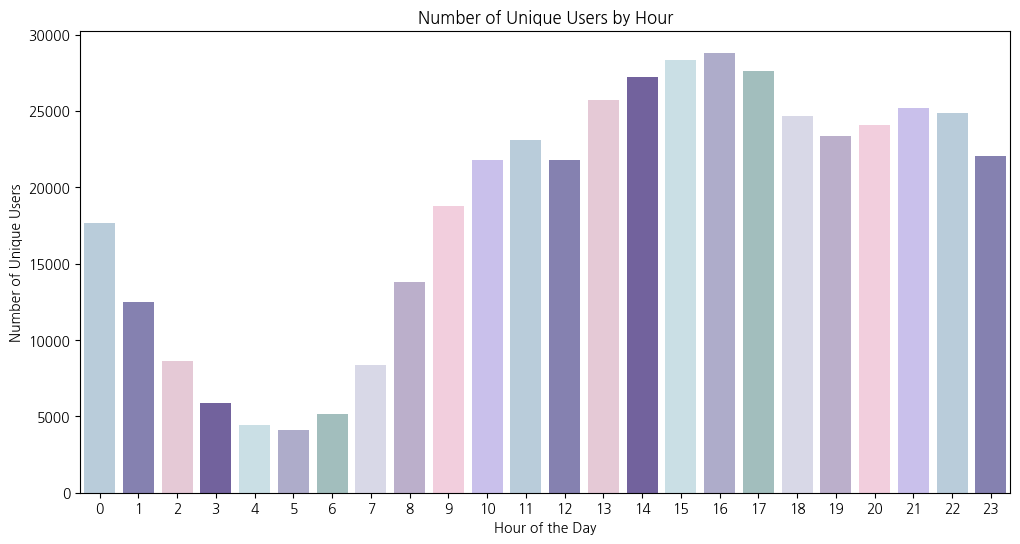

In [424]:
import seaborn as sns
import matplotlib.pyplot as plt

# 팔레트 설정
palette = ['#b3cde0', '#7e79b8', '#eac4d5', '#6e58a7', '#c6e2e9',
           '#a9a7cf', '#9dc3c1', '#d5d5e9', '#baaad0', '#f8c8dc', '#c5b9f2']

# enter_lesson_time에서 시간 추출
enter_lesson_page_finalised_unique['hour'] = enter_lesson_page_finalised_unique['enter_lesson_time'].dt.hour

# 각 시간대별 user_id 수 계산
hourly_user_count = enter_lesson_page_finalised_unique.groupby('hour')['user_id'].nunique().reset_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='user_id', data=hourly_user_count, palette=palette)
plt.title('Number of Unique Users by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Unique Users')
plt.xticks(range(0, 24))
plt.show()

In [101]:
# 24시간 시작, 끝이 모두 있는 데이터만 필터링

# event_time_complete와 event_time을 datetime 형식으로 변환
matched_df['event_time_complete'] = pd.to_datetime(matched_df['event_time_complete'])
matched_df['event_time'] = pd.to_datetime(matched_df['event_time'])

# complete_df와 enter_df를 matched_df와 병합 (user_id, content_id, lesson_id를 기준으로 병합)
complete_df = matched_df[['user_id', 'content_id', 'lesson_id', 'event_time_complete']]
enter_df = matched_df[['user_id', 'content_id', 'lesson_id', 'event_time']]

# 병합하여 event_time과 event_time_complete 사이의 시간 차이 계산
merged_df = pd.merge(complete_df, enter_df, on=['user_id', 'content_id', 'lesson_id'], suffixes=('_complete', '_enter'))

# 병합된 데이터프레임의 열 이름 확인
print(merged_df.columns)

# 시간 차이를 초 단위로 계산
merged_df['time_diff'] = (merged_df['event_time_complete'] - merged_df['event_time']).dt.total_seconds()

# 시간 차이가 24시간(86400초) 이내인 경우만 필터링
filtered_df = merged_df[merged_df['time_diff'] <= 86400]

# 결과 출력
filtered_df

Index(['user_id', 'content_id', 'lesson_id', 'event_time_complete',
       'event_time'],
      dtype='object')


,user_id,content_id,lesson_id,event_time_complete,event_time,time_diff
1,459c1fe98bb5a1024f942c06c9883615,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9,2022-01-01 10:28:15.544,2022-01-01 10:25:19.668,1.758760e+02
2,459c1fe98bb5a1024f942c06c9883615,68a3658f1b936bfff3bd6960cd561b0a,54dd3f1d5ccc6ed8f75c99d4b92feacf,2022-01-01 10:35:04.805,2022-01-01 10:28:16.287,4.085180e+02
3,459c1fe98bb5a1024f942c06c9883615,68a3658f1b936bfff3bd6960cd561b0a,54dd3f1d5ccc6ed8f75c99d4b92feacf,2022-01-01 10:35:04.805,2022-05-03 23:26:17.427,-1.058707e+07
4,459c1fe98bb5a1024f942c06c9883615,68a3658f1b936bfff3bd6960cd561b0a,1ec838a253800869b1724bbb1da49376,2022-01-01 10:43:47.151,2022-01-01 10:35:04.612,5.225390e+02
5,459c1fe98bb5a1024f942c06c9883615,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476,2022-01-01 10:45:38.806,2022-01-01 10:43:47.037,1.117690e+02
...,...,...,...,...,...,...
17666903,7076bfc876954e044e60c37dfa9cd36d,d6227ba76134f6cf821bb98b5f235bd0,ca8fc4063166c5c32652a2ed9b3ca6fb,2023-12-31 23:48:43.737,2023-12-31 23:46:32.379,1.313580e+02
17666904,481247c0a2d1dcc3a0ed3e8db9f46ccb,b314d5aba64a0aab40602cb72a4a1504,9c9ce3ab4cc3c6f11634a527f39de056,2023-12-31 23:53:19.714,2023-12-31 23:47:45.432,3.342820e+02
17666905,6bb6a6abf52d45673b14ae511d33db8d,c8e53577758bf66711094352a5abd8c3,b7d5d38f49d78cdbcfe01c9c96051159,2023-12-31 23:49:51.407,2023-12-31 23:48:43.087,6.832000e+01
17666909,772a0f028f7ac03ebba57c7e0f8f73fe,61b6463287573f00de13a930805a52d6,6e3afbeb4942c6c29038321e5995f4f1,2023-12-31 23:54:06.177,2023-12-31 23:50:19.682,2.264950e+02


In [104]:
# time_diff 60초 미만 삭제제
filtered_df = filtered_df[filtered_df['time_diff'] > 60]

In [105]:
filtered_df.describe()

,event_time_complete,event_time,time_diff
count,409991,409991,409991.000000
mean,2022-09-16 10:34:08.252963072,2022-09-16 10:04:21.032134144,1787.220829
min,2022-01-01 10:28:15.544000,2022-01-01 10:25:19.668000,60.001000
25%,2022-05-13 04:02:41.376000,2022-05-13 03:43:27.727500032,148.468000
50%,2022-07-20 12:36:20.067000064,2022-07-20 12:04:39.127000064,269.066000
75%,2022-12-21 15:08:37.020999936,2022-12-21 14:45:31.453000192,587.430000
max,2023-12-31 23:54:06.177000,2023-12-31 23:50:19.682000,86394.841000
std,NaN,NaN,8200.745127


In [106]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409991 entries, 1 to 17666909
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   user_id              409991 non-null  object        
 1   content_id           409991 non-null  object        
 2   lesson_id            409991 non-null  object        
 3   event_time_complete  409991 non-null  datetime64[ns]
 4   event_time           409991 non-null  datetime64[ns]
 5   time_diff            409991 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 21.9+ MB


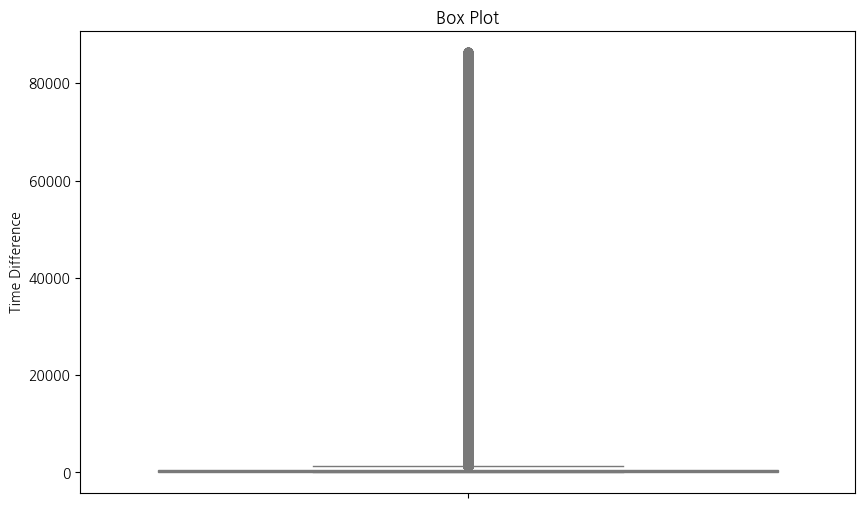

In [107]:
# 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(y=filtered_df['time_diff'])
plt.title('Box Plot')
plt.ylabel('Time Difference')
plt.show()

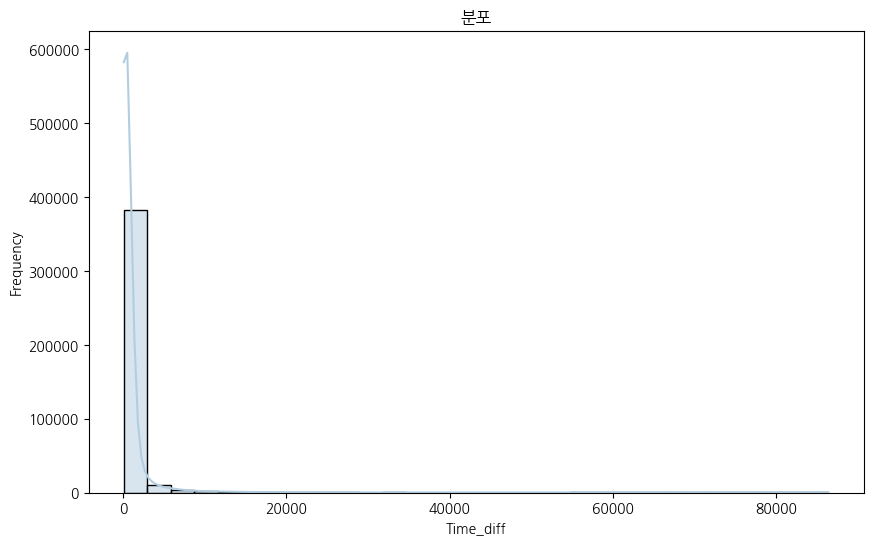

In [108]:
# time_diff 분포
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['time_diff'], bins=30, kde=True)
plt.title('분포')
plt.xlabel('Time_diff')
plt.ylabel('Frequency')

plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [109]:
# 'user_id', 'lesson_id', 'event_time_complete' 기준으로 중복된 행 찾기
duplicates = filtered_df.dropna(subset=['event_time_complete'])
duplicates = duplicates[duplicates.duplicated(subset=['user_id', 'lesson_id', 'event_time_complete'], keep=False)]
duplicates

,user_id,content_id,lesson_id,event_time_complete,event_time,time_diff
4127,64ef2c3f10020a887880ee98ef749482,f64c475280676531a31f2f8e0648599c,ff4c3c070c623be2da90a5a84313ecdc,2022-01-10 07:52:42.942,2022-01-10 07:04:42.271,2880.671
4128,64ef2c3f10020a887880ee98ef749482,f64c475280676531a31f2f8e0648599c,ff4c3c070c623be2da90a5a84313ecdc,2022-01-10 07:52:42.942,2022-01-10 07:07:06.703,2736.239
4129,64ef2c3f10020a887880ee98ef749482,f64c475280676531a31f2f8e0648599c,ff4c3c070c623be2da90a5a84313ecdc,2022-01-10 07:52:42.942,2022-01-10 07:08:53.065,2629.877
18949,914f1ce87f1c51b0f1cdf4ff858b4804,68a3658f1b936bfff3bd6960cd561b0a,fafaf3621bdc750a900cea7b8ef04569,2022-01-28 15:55:26.118,2022-01-28 15:39:06.244,979.874
18950,914f1ce87f1c51b0f1cdf4ff858b4804,68a3658f1b936bfff3bd6960cd561b0a,fafaf3621bdc750a900cea7b8ef04569,2022-01-28 15:55:26.118,2022-01-28 15:44:37.802,648.316
...,...,...,...,...,...,...
17654715,5c2ce4062550e53fa30c3f53b8c9b181,61b6463287573f00de13a930805a52d6,2ed4b83e65edc2b1efb193aaa3c60cf9,2023-12-24 21:57:33.775,2023-12-24 18:52:39.840,11093.935
17654716,5c2ce4062550e53fa30c3f53b8c9b181,61b6463287573f00de13a930805a52d6,2ed4b83e65edc2b1efb193aaa3c60cf9,2023-12-24 21:57:33.775,2023-12-24 19:58:29.691,7144.084
17659363,5c2ce4062550e53fa30c3f53b8c9b181,f4be1a0fe0e301b03115591777fddf29,b42c9bb32f5024900cbed7623eecd272,2023-12-27 15:59:30.381,2023-12-26 19:22:36.156,74214.225
17659364,5c2ce4062550e53fa30c3f53b8c9b181,f4be1a0fe0e301b03115591777fddf29,b42c9bb32f5024900cbed7623eecd272,2023-12-27 15:59:30.381,2023-12-26 19:59:08.752,72021.629


In [110]:
filtered_df.describe()


,event_time_complete,event_time,time_diff
count,409991,409991,409991.000000
mean,2022-09-16 10:34:08.252963072,2022-09-16 10:04:21.032134144,1787.220829
min,2022-01-01 10:28:15.544000,2022-01-01 10:25:19.668000,60.001000
25%,2022-05-13 04:02:41.376000,2022-05-13 03:43:27.727500032,148.468000
50%,2022-07-20 12:36:20.067000064,2022-07-20 12:04:39.127000064,269.066000
75%,2022-12-21 15:08:37.020999936,2022-12-21 14:45:31.453000192,587.430000
max,2023-12-31 23:54:06.177000,2023-12-31 23:50:19.682000,86394.841000
std,NaN,NaN,8200.745127


In [111]:
# filtered_df 'user_id', 'lesson_id', 'event_time_complete' 기준으로 중복된 행이 있다면, 그 중 첫 번째 행만 event_time_complete을 남기고 나머지는 NAN으로 변경 후 삭제

# 중복된 행 찾기 (첫 번째 행을 제외한 나머지 행)
duplicates = filtered_df.duplicated(subset=['user_id', 'lesson_id', 'event_time_complete'], keep='first')

# 중복된 행의 event_time_complete을 NaN으로 변경
filtered_df.loc[duplicates, 'event_time_complete'] = pd.NaT

# NaN으로 변경된 행 삭제
filtered_df = filtered_df.dropna(subset=['event_time_complete'])

# 결과 출력
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409254 entries, 1 to 17666909
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   user_id              409254 non-null  object        
 1   content_id           409254 non-null  object        
 2   lesson_id            409254 non-null  object        
 3   event_time_complete  409254 non-null  datetime64[ns]
 4   event_time           409254 non-null  datetime64[ns]
 5   time_diff            409254 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 21.9+ MB


In [112]:
filtered_df.describe()

,event_time_complete,event_time,time_diff
count,409254,409254,409254.000000
mean,2022-09-15 23:34:22.366526720,2022-09-15 23:04:55.138611968,1767.227915
min,2022-01-01 10:28:15.544000,2022-01-01 10:25:19.668000,60.001000
25%,2022-05-13 00:03:21.385499904,2022-05-12 23:47:37.461249792,148.369250
50%,2022-07-20 09:26:28.594999808,2022-07-20 08:38:21.658999808,268.677500
75%,2022-12-20 00:50:56.460250112,2022-12-20 00:27:04.267499776,585.720500
max,2023-12-31 23:54:06.177000,2023-12-31 23:50:19.682000,86394.841000
std,NaN,NaN,8131.622692


In [113]:
print(f'유저 수: {filtered_df['user_id'].nunique()}')
print(f'content_id 수: {filtered_df["content_id"].nunique()}')  
print(f'lesson_id 수: {filtered_df["lesson_id"].nunique()}')
print(f'event_time_complete 수: {filtered_df["event_time_complete"].nunique()}')
print(f'time_diff 최소값: {filtered_df["time_diff"].min()}')
print(f'time_diff 최대값: {filtered_df["time_diff"].max()}')
print(f'time_diff 평균값: {filtered_df["time_diff"].mean()}')

유저 수: 11050
content_id 수: 116
lesson_id 수: 4300
event_time_complete 수: 409254
time_diff 최소값: 60.001
time_diff 최대값: 86394.841
time_diff 평균값: 1767.2279147351032


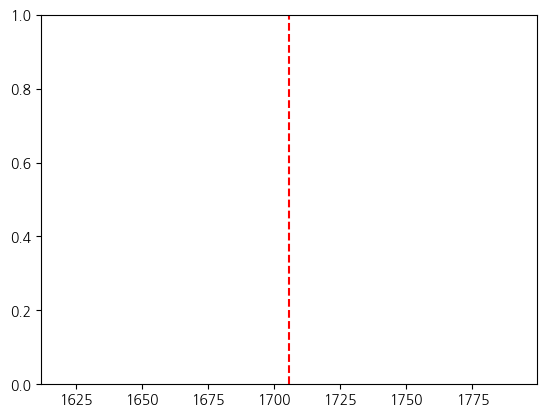

In [114]:
ninety = filtered_df['time_diff'].quantile(0.9)
plt.axvline(ninety, color='red', linestyle='--', label='90% 지점')

In [115]:
# user_id 별 time_diff의 합합
user_study_time = filtered_df.groupby('user_id')['time_diff'].sum()

# 데이터프레임으로 변환
user_study_time = user_study_time.reset_index()
user_study_time

,user_id,time_diff
0,0000572f2ba8079bcefd2760b632e820,633.446
1,000087537cbfd934375364218ff10f91,386.183
2,0001f15911b404f3bf5b8571afafa4e4,4920.047
3,000be07bc09ceff42c11978f4a9f1c1a,32811.514
4,001cd989a26ba664b086b92c364dc9cf,7536.299
...,...,...
11045,ffe800abf1a0c00994b2a5b1ce68c681,1050.267
11046,ffe8f08cd65e082952aca5a3110f5601,190648.571
11047,ffefd2c23af0e8de9a5bb9aebc498d07,676.991
11048,fff219b952002818462faa3746343f09,440916.388


In [489]:
# 분 단위 time_diff 열 추가
user_study_time['time_diff_minute'] = user_study_time['time_diff'] / 60
user_study_time

,user_id,time_diff,time_diff_minute,study_group
0,0000572f2ba8079bcefd2760b632e820,633.446,10.557433,Low
1,000087537cbfd934375364218ff10f91,386.183,6.436383,Low
2,0001f15911b404f3bf5b8571afafa4e4,4920.047,82.000783,Medium
3,000be07bc09ceff42c11978f4a9f1c1a,32811.514,546.858567,Medium
4,001cd989a26ba664b086b92c364dc9cf,7536.299,125.604983,Medium
...,...,...,...,...
11045,ffe800abf1a0c00994b2a5b1ce68c681,1050.267,17.504450,Low
11046,ffe8f08cd65e082952aca5a3110f5601,190648.571,3177.476183,High
11047,ffefd2c23af0e8de9a5bb9aebc498d07,676.991,11.283183,Low
11048,fff219b952002818462faa3746343f09,440916.388,7348.606467,High


In [117]:
user_study_time.describe()

,time_diff,time_diff_minute
count,1.105000e+04,11050.000000
mean,6.545204e+04,1090.867410
std,1.411338e+05,2352.229417
min,6.001600e+01,1.000267
25%,2.048676e+03,34.144604
50%,1.231178e+04,205.196333
75%,7.886615e+04,1314.435850
max,3.502326e+06,58372.102483


### 25%, 50%, 75% 기준으로 유저군 분류

In [118]:
def classify_study_time_groups(df):
    # 1️⃣ 사분위수 계산
    q1 = df['time_diff'].quantile(0.25)  # 1분위 (하위 25%)
    q3 = df['time_diff'].quantile(0.75)  # 3분위 (상위 25%)

    # 2️⃣ 그룹 분류 함수
    def categorize(time_diff):
        if time_diff >= q3:
            return 'High'   # 공부 많이 한 그룹 (상위 25%)
        elif time_diff <= q1:
            return 'Low'    # 공부 안 하는 그룹 (하위 25%)
        else:
            return 'Medium' # 중간 그룹 (중간 50%)

    # 3️⃣ 그룹 분류 컬럼 추가
    df['study_group'] = df['time_diff'].apply(categorize)

    return df

# user_study_time 데이터프레임에 그룹 분류 적용
user_study_time_with_groups = classify_study_time_groups(user_study_time)

# 결과 출력
user_study_time_with_groups.head()

,user_id,time_diff,time_diff_minute,study_group
0,0000572f2ba8079bcefd2760b632e820,633.446,10.557433,Low
1,000087537cbfd934375364218ff10f91,386.183,6.436383,Low
2,0001f15911b404f3bf5b8571afafa4e4,4920.047,82.000783,Medium
3,000be07bc09ceff42c11978f4a9f1c1a,32811.514,546.858567,Medium
4,001cd989a26ba664b086b92c364dc9cf,7536.299,125.604983,Medium


In [119]:
user_study_time_with_groups['study_group'].value_counts()

study_group
Medium    5524
Low       2763
High      2763
Name: count, dtype: int64

- 그룹별 describe

In [120]:
user_study_time_with_groups[user_study_time_with_groups['study_group'] == 'High'].describe()

,time_diff,time_diff_minute
count,2.763000e+03,2763.000000
mean,2.173577e+05,3622.628591
std,2.183479e+05,3639.132328
min,7.886915e+04,1314.485900
25%,9.819219e+04,1636.536433
50%,1.483754e+05,2472.923350
75%,2.404625e+05,4007.708275
max,3.502326e+06,58372.102483


In [121]:
user_study_time_with_groups[user_study_time_with_groups['study_group'] == 'Medium'].describe()

,time_diff,time_diff_minute
count,5524.000000,5524.000000
mean,21807.713920,363.461899
std,21585.912387,359.765206
min,2048.761000,34.146017
25%,5088.945500,84.815758
50%,12311.780000,205.196333
75%,33083.504750,551.391746
max,78857.142000,1314.285700


In [122]:
user_study_time_with_groups[user_study_time_with_groups['study_group'] == 'Low'].describe()

,time_diff,time_diff_minute
count,2763.000000,2763.000000
mean,803.443186,13.390720
std,561.664545,9.361076
min,60.016000,1.000267
25%,309.328500,5.155475
50%,688.642000,11.477367
75%,1226.566500,20.442775
max,2048.648000,34.144133


C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\2876473387.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='study_group', data=user_study_time_with_groups, order=['High', 'Medium', 'Low'], palette=palette)


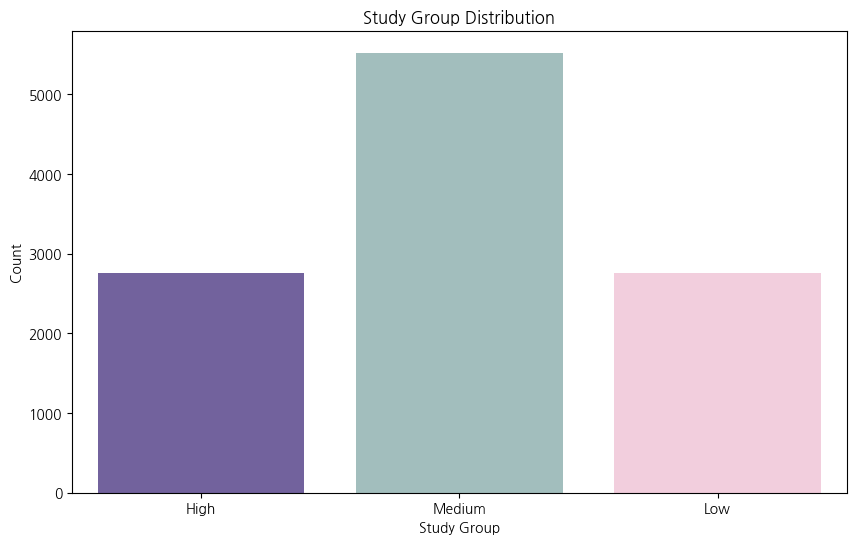

In [123]:
# user_study_time_with_groups['study_group']의 value_counts()를 그래프로 출력
#  팔레트
#palette = ['#b3cde0', '#7e79b8', '#eac4d5', '#6e58a7', '#c6e2e9',
#            '#a9a7cf', '#9dc3c1','#d5d5e9', '#baaad0', '#f8c8dc', '#c5b9f2']  


# 각 study_group에 대한 색상 지정
palette = {'High': '#6e58a7', 'Medium': '#9dc3c1', 'Low': '#f8c8dc'}

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.countplot(x='study_group', data=user_study_time_with_groups, order=['High', 'Medium', 'Low'], palette=palette)
plt.title('Study Group Distribution')
plt.xlabel('Study Group')
plt.ylabel('Count')
plt.show()

### 첫 결제

In [124]:
complete_subscription.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
0,Nowon-gu,2023-04-06 06:40:04.000,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Edge,111.0.1661.62,Web,1116a2ae90ca6b06f85feba27ad51ef0,15920,15920,0,NaN
1,Seoul,2023-04-10 23:20:03.008,South Korea,NaN,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,16.3,Web,c0f5678df8967163e6e2c464ed006791,131600,131600,0,NaN
2,Yangsan,2023-03-12 17:46:14.026,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,79421b5d038205ad7adbb1e2c3b89741,131600,119756,11844,NaN
3,Geumjeong-gu,2023-04-12 20:35:01.865,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180,131600,131600,0,NaN
4,Gwangmyeong,2023-05-31 10:25:55.820,South Korea,NaN,Mac,Mac,complete.subscription,Korean,Chrome,113.0.0.0,Web,d4f54ecf6c4d7bf8742f80505f02d6dc,15920,15920,0,NaN


In [126]:
len(subscription_user_id_list)

13875

In [127]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409254 entries, 1 to 17666909
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   user_id              409254 non-null  object        
 1   content_id           409254 non-null  object        
 2   lesson_id            409254 non-null  object        
 3   event_time_complete  409254 non-null  datetime64[ns]
 4   event_time           409254 non-null  datetime64[ns]
 5   time_diff            409254 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 21.9+ MB


In [128]:
# active, inactive 유저 구분분

# user_study_time_with_groups의 user_id를 고유한 값으로 추출
study_time_users = user_study_time_with_groups['user_id'].unique()

# 활동이 있는 유저 찾기 (subscription_user_id_list에 있는 경우)
active_users = [user_id for user_id in subscription_user_id_list if user_id in study_time_users]

# 활동이 없는 유저 찾기 (subscription_user_id_list에 있지만 study_time_users에 없는 경우)
inactive_users = [user_id for user_id in subscription_user_id_list if user_id not in study_time_users]

# 결과 출력
print(f"활동 기록이 있는 첫 결제 유저 수: {len(active_users)}")
print(f"활동 기록이 없는 첫 결제 유저 수: {len(inactive_users)}")

활동 기록이 있는 첫 결제 유저 수: 11050
활동 기록이 없는 첫 결제 유저 수: 2825


In [129]:
print(len(subscription_user_id_list))
print(user_study_time_with_groups['user_id'].nunique())

13875
11050


In [130]:
# subscription_user_id_list에 있는 user_id만 남기고 필터링
filtered_user_study_time = user_study_time_with_groups[user_study_time_with_groups['user_id'].isin(subscription_user_id_list)]

# 결과 출력
filtered_user_study_time.head()

,user_id,time_diff,time_diff_minute,study_group
0,0000572f2ba8079bcefd2760b632e820,633.446,10.557433,Low
1,000087537cbfd934375364218ff10f91,386.183,6.436383,Low
2,0001f15911b404f3bf5b8571afafa4e4,4920.047,82.000783,Medium
3,000be07bc09ceff42c11978f4a9f1c1a,32811.514,546.858567,Medium
4,001cd989a26ba664b086b92c364dc9cf,7536.299,125.604983,Medium


## 학습시간이 정기결제로의 전환에 영향을 미치나?

### 정기결제 전환

In [ ]:
# 정기결제 데이터(renew_subscription) 전처리리
renew_subscription = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/renew_subscription.csv')
renew_subscription['client_event_time'] = pd.to_datetime(renew_subscription['client_event_time'], errors='coerce')
renew_subscription['client_event_time'] = renew_subscription['client_event_time'] + pd.Timedelta(hours=9)
renew_subscription = renew_subscription.loc[
    renew_subscription['client_event_time'].dt.year.between(2022, 2023)]
renew_subscription.drop(renew_subscription[renew_subscription['os_name'] == 'Chrome Headless'].index, inplace=True)

In [132]:
renew_subscription.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
0,Nam-gu,2022-09-08 12:05:02.068,South Korea,NaN,Windows,Windows,renew.subscription,Korean,Edge,104,Web,6ddea3af2eaae869861c1190dcc9d4a3,15920,15920,0,NaN
1,Nam-gu,2022-09-08 12:40:02.050,South Korea,NaN,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,c2d47034960fdff5df495822ff66fbc1,15920,15920,0,NaN
2,Dongjak-gu,2022-09-08 12:49:00.829,South Korea,NaN,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,de91f1226dd938990fefc79545daf468,42960,40812,2148,NaN
3,Yongin-si,2022-09-08 13:10:06.406,South Korea,NaN,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,bf14840a8cb4643e6d557da96e35a3af,15920,15920,0,NaN
4,Dongjak-gu,2022-09-08 13:40:01.895,South Korea,NaN,Android,Android,renew.subscription,Korean,Chrome Mobile,103,Web,7ddc1c2990d0645d82885394e3c518b5,15920,15920,0,NaN


In [133]:
print(renew_subscription['client_event_time'].min())
print(renew_subscription['client_event_time'].max())


2022-09-08 12:05:02.068000
2023-12-31 23:50:02.215000


In [134]:
filtered_user_study_time['study_group'].value_counts()

study_group
Medium    5524
Low       2763
High      2763
Name: count, dtype: int64

In [ ]:
# subscription_user_id_list에 있는 user_id만 남기고 필터링
filtered_user_study_time = user_study_time_with_groups[user_study_time_with_groups['user_id'].isin(subscription_user_id_list)]

# renew_subscription과 filtered_user_study_time를 user_id를 기준으로 병합
merged_df = pd.merge(renew_subscription, filtered_user_study_time[['user_id', 'study_group']], on='user_id', how='inner')

# study_group별로 정기결제로 넘어간 user_id 개수 구하기
renewed_study_group_counts = merged_df.groupby('study_group')['user_id'].nunique().reset_index()
renewed_study_group_counts.columns = ['study_group', 'renewed_user_count']

# study_group별 원래 user_id 개수 구하기
original_study_group_counts = filtered_user_study_time.groupby('study_group')['user_id'].nunique().reset_index()
original_study_group_counts.columns = ['study_group', 'original_user_count']

# 두 데이터프레임 병합
study_group_counts = pd.merge(original_study_group_counts, renewed_study_group_counts, on='study_group', how='left')

# 결과 출력
study_group_counts

,study_group,original_user_count,renewed_user_count
0,High,2763,1285
1,Low,2763,1053
2,Medium,5524,2344


In [411]:
study_group_counts['renew_percent'] = round(study_group_counts['renewed_user_count'] / study_group_counts['original_user_count'] * 100, 2)
study_group_counts = study_group_counts.sort_values(by='renew_percent', ascending=False).reset_index(drop = True)
study_group_counts

,study_group,original_user_count,renewed_user_count,renew_percent
0,High,2763,1285,46.51
1,Medium,5524,2344,42.43
2,Low,2763,1053,38.11


In [494]:
# 수강 -> 정기결제 전환율율
study_group_counts['renewed_user_count'].sum() / study_group_counts['original_user_count'].sum() * 100

42.3710407239819

- 많은 시간을 수강에 투자할수록 정기결제 전환율이 높다!!!!!

### 정기결제 전환율 수치

In [413]:
# 이탈률 추가, 열 이름 변경
study_group_counts['churn_rate'] = 100 - study_group_counts['renew_percent']

# 정기결제 전환율(%)을 기준으로 내림차순 정렬하고 인덱스 초기화
study_group_counts = study_group_counts.sort_values(by='renew_percent', ascending=False).reset_index(drop=True)
study_group_counts

,study_group,original_user_count,renewed_user_count,renew_percent,churn_rate
0,High,2763,1285,46.51,53.49
1,Medium,5524,2344,42.43,57.57
2,Low,2763,1053,38.11,61.89


In [142]:
renew_subscription['user_id'].nunique()

7498

### 학습 시간에 따른 정기결제 전환율 통계 검정
- 귀무가설 : 학습 시간과 정기결제 전환율은 연관이 없다.
- 대립가설 : 학습 시간과 정기결제 전환율은 연관이 있다.

In [ ]:
# subscription_user_id_list에 있는 user_id만 남기고 필터링
filtered_user_study_time = user_study_time_with_groups[user_study_time_with_groups['user_id'].isin(subscription_user_id_list)]

# renew_subscription과 filtered_user_study_time를 user_id를 기준으로 병합
merged_df = pd.merge(renew_subscription, filtered_user_study_time[['user_id', 'study_group']], on='user_id', how='inner')

# study_group별로 정기결제로 넘어간 user_id 개수 구하기
renewed_study_group_counts = merged_df.groupby('study_group')['user_id'].nunique().reset_index()
renewed_study_group_counts.columns = ['study_group', 'renewed_user_count']

# study_group별 원래 user_id 개수 구하기
original_study_group_counts = filtered_user_study_time.groupby('study_group')['user_id'].nunique().reset_index()
original_study_group_counts.columns = ['study_group', 'original_user_count']

# 두 데이터프레임 병합
study_group_counts = pd.merge(original_study_group_counts, renewed_study_group_counts, on='study_group', how='left')

# NaN 값을 0으로 대체
study_group_counts['renewed_user_count'] = study_group_counts['renewed_user_count'].fillna(0)

# 카이제곱 독립성 검정을 위한 교차표 생성
contingency_table = study_group_counts[['original_user_count', 'renewed_user_count']].values

# 카이제곱 독립성 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"카이제곱: {chi2}")
print(f"P-value: {p}")
print(f"자유도(dof): {dof}")
print("기대빈도:")
print(expected)

# 귀무가설 검정 결과
if p < 0.05:
    print("대립가설 채택: 학습 시간과 정기결제 전환율은 연관이 있다.")
else:
    print("귀무가설 채택: 학습 시간과 정기결제 전환율은 연관이 없다.")

카이제곱: 16.18856287066379
P-value: 0.0003052799189092345
자유도(dof): 2
기대빈도:
[[2843.2748538  1204.7251462 ]
 [2680.32036613 1135.67963387]
 [5526.40478007 2341.59521993]]
대립가설 채택: 학습 시간과 정기결제 전환율은 연관이 있다.


In [416]:
print(len(matched_df))
print(len(filtered_user_study_time))
print(len(renew_subscription))

3388959
11050
15944


In [417]:
matched_df.head()

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete,time_diff
0,28562e887d0942c8f422f1ffa1c12bc0,2022-01-01 09:30:37.101,enter,38df90d4de533d6296b52c6a1d90e26b,80aac6e426ef54f462cc4e3fea699e0c,NaT,NaN,NaN
1,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:25:19.668,enter,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9,2022-01-01 10:28:15.544,complete,175.876
2,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:28:16.287,enter,68a3658f1b936bfff3bd6960cd561b0a,54dd3f1d5ccc6ed8f75c99d4b92feacf,2022-01-01 10:35:04.805,complete,408.518
3,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:35:04.612,enter,68a3658f1b936bfff3bd6960cd561b0a,1ec838a253800869b1724bbb1da49376,2022-01-01 10:43:47.151,complete,522.539
4,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:43:47.037,enter,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476,2022-01-01 10:45:38.806,complete,111.769


In [418]:
print(matched_df['event_time_complete'].nunique())
print(matched_df['event_time'].nunique())
print(matched_df['time_diff'].nunique())

700473
3388812
377801


In [491]:
complete_subscription['user_id'].nunique()

13875

In [419]:
print(f'유저 수: {filtered_df['user_id'].nunique()}')
print(f'content_id 수: {filtered_df["content_id"].nunique()}')  
print(f'lesson_id 수: {filtered_df["lesson_id"].nunique()}')
print(f'event_time_complete 수: {filtered_df["event_time_complete"].nunique()}')
print(f'time_diff 최소값: {filtered_df["time_diff"].min()}')
print(f'time_diff 최대값: {filtered_df["time_diff"].max()}')
print(f'time_diff 평균값: {filtered_df["time_diff"].mean()}')


유저 수: 11050
content_id 수: 116
lesson_id 수: 4300
event_time_complete 수: 409254
time_diff 최소값: 60.001
time_diff 최대값: 86394.841
time_diff 평균값: 1767.2279147351032


In [420]:
print(matched_df['time_diff'].nunique())
print(filtered_df['time_diff'].nunique())

377801
314030


In [421]:
print(filtered_df["time_diff"].nunique() / matched_df['time_diff'].nunique())

0.831204787705697


In [422]:
print(filtered_df["event_time_complete"].nunique() / matched_df['event_time_complete'].nunique())

0.5842537828010501


In [423]:
complete_subscription.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
0,Nowon-gu,2023-04-06 06:40:04.000,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Edge,111.0.1661.62,Web,1116a2ae90ca6b06f85feba27ad51ef0,15920,15920,0,NaN
1,Seoul,2023-04-10 23:20:03.008,South Korea,NaN,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,16.3,Web,c0f5678df8967163e6e2c464ed006791,131600,131600,0,NaN
2,Yangsan,2023-03-12 17:46:14.026,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,79421b5d038205ad7adbb1e2c3b89741,131600,119756,11844,NaN
3,Geumjeong-gu,2023-04-12 20:35:01.865,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180,131600,131600,0,NaN
4,Gwangmyeong,2023-05-31 10:25:55.820,South Korea,NaN,Mac,Mac,complete.subscription,Korean,Chrome,113.0.0.0,Web,d4f54ecf6c4d7bf8742f80505f02d6dc,15920,15920,0,NaN


### 정기결제 -> 재구독

In [ ]:
# 재구독 데이터(resubscribe_subcription) 전처리
resubscribe_subscription = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/resubscribe_subscription.csv')
resubscribe_subscription['client_event_time'] = pd.to_datetime(resubscribe_subscription['client_event_time'], errors='coerce')
resubscribe_subscription['client_event_time'] = resubscribe_subscription['client_event_time'] + pd.Timedelta(hours=9)
resubscribe_subscription = resubscribe_subscription.loc[
    resubscribe_subscription['client_event_time'].dt.year.between(2022, 2023)]
resubscribe_subscription.drop(resubscribe_subscription[resubscribe_subscription['os_name'] == 'Chrome Headless'].index, inplace=True)

In [154]:
# resubscribe_subscription의 user_id를 renew_subscription 안에서 찾기기
resubscribe_users_count = resubscribe_subscription[resubscribe_subscription['user_id'].isin(renew_subscription['user_id'])]['user_id'].nunique()

In [155]:
click_cancel_plan = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/click_cancel_plan_button.csv')
click_cancel_plan['client_event_time'] = pd.to_datetime(click_cancel_plan['client_event_time'], errors='coerce')
click_cancel_plan['client_event_time'] = click_cancel_plan['client_event_time'] + pd.Timedelta(hours=9)
click_cancel_plan = click_cancel_plan.loc[
    click_cancel_plan['client_event_time'].dt.year.between(2022, 2023)]
click_cancel_plan.drop(click_cancel_plan[click_cancel_plan['os_name'] == 'Chrome Headless'].index, inplace=True)

In [156]:
click_cancel_plan.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Daegu,2023-04-10 23:57:48.556,South Korea,NaN,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,9e59ecf9a8fbe9051bd0d54f4b702f30
1,Seoul,2023-03-12 17:26:16.224,South Korea,NaN,Apple iPad,Apple iPad,click.cancel_plan_button,English,Mobile Safari,16.3,Web,4ed4d8f12c45504a148bfff0f2e9466e
2,Uijeongbu-si,2023-03-12 17:23:04.955,South Korea,NaN,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,b6a1bba3cc4139d7dc821561319221e6
3,Dobong-gu,2023-03-12 17:32:39.271,South Korea,NaN,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748
4,Geumjeong-gu,2023-04-12 20:36:28.311,South Korea,NaN,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180


In [157]:
# renew_subscription, click_cancel_plan, resubscribe_subscription의 client_event_time이 시간 순서대로 있는 user_id 찾기

sorted_user_id = pd.Series(renew_subscription['user_id'].unique())
sorted_user_id = sorted_user_id[sorted_user_id.isin(click_cancel_plan['user_id'])]
sorted_user_id = sorted_user_id[sorted_user_id.isin(resubscribe_subscription['user_id'])]

# 결과 출력
print(sorted_user_id)

1       c2d47034960fdff5df495822ff66fbc1
61      6abf383e862ef4d0f29b9b29182f36a5
89      568096ead305c84240f3b1cdbfd8afb9
105     3d66fba0584e37ec6b6b0bc5302cd4d8
127     9bd2c5bb4639f36874e859facbd5faf5
                      ...               
7091    e07feb717b6ed7bfce3e610c14b92891
7185    92732642cfdb83427ea916f35882b45d
7275    fd677cf2a08f2c01b6e02dd9be0d7da2
7283    86012338916c4102a9b11559981dcab5
7404    735f207da30919eafdb41672ffe60a7c
Length: 445, dtype: object


In [158]:
click_cancel_plan['user_id'].nunique()

14641

In [159]:
# 세 개의 데이터프레임을 하나로 합쳐서 시간 순으로 정렬
merged_df = pd.concat([
    renew_subscription.assign(event='renew'),
    click_cancel_plan.assign(event='cancel'),
    resubscribe_subscription.assign(event='resubscribe')
])

merged_df = merged_df.sort_values(['user_id', 'client_event_time'])

# 올바른 순서를 따르는 user_id 찾기
def check_order(df):
    events = df['event'].tolist()
    return events == ['renew', 'cancel', 'resubscribe']

# 그룹별로 필터링
valid_users = merged_df.groupby('user_id').filter(check_order)['user_id'].unique()

print(valid_users)

['0108538a502bb0339cdee7d33f96a510' '0292f9b9e5eee6d5419862b20151993e'
 '1b75ac5cb59e8aed2fae325a9cec63e8' '43f4c6740ddadba5081ff6236b8efbe1'
 '6097a1a40c3a32ee6af796e32ff82a15' '6273ea481a53ad142f85be81c6e6644a'
 '6d9d527d68154f3d790133d5c7bf34e3' '7f742dabddf2b60069b465e4b8ca5b43'
 'a7102cebfbc2873d5219ede74fb59aed' 'a9a7d711a3dd6ee4bba891b117169da4'
 'c2f0e5412d80df770e6004b00da998ce' 'cf0e4ad5bfaac5f91b54a84b424bfcdd'
 'd22e08da8aea3774e791244666d6f971' 'd3865b8eafdba1ec3cdc8126d4a010c1'
 'd77f6d0cb941179f981240b741e2e036' 'daa567a0f4a0230fc8af8866916fdae4'
 'e037cc02f429f720e2e6cbcdee3de349' 'eaff98093acb9a109975957cafb2d105'
 'f4e6c1833f5d74611bc809632103877b' 'ff27c0ef4f7c2c87a09e295c496727f5']


In [160]:
len(valid_users)

20

In [161]:
click_cancel_plan['client_event_time'].min()

Timestamp('2022-01-01 11:24:46.052000')

- 만료의 사전적 의미: 기한이 다 차서 끝남 -> 구독을 취소한 뒤 재구독한 사람은 만료 후 재구독이라 볼 수 없다.
- 위 user_id들은 제외한다.

In [162]:
# renew_subscription에서 resubscription_subscription으로 넘어간 user_id를를 찾으려고 해.
# valid_users는 제외하고 싶어.

# renew_subscription과 resubscribe_subscription의 user_id 추출
renew_user_ids = set(renew_subscription['user_id'].unique())
resubscribe_user_ids = set(resubscribe_subscription['user_id'].unique())

# renew_subscription에서 resubscribe_subscription으로 넘어간 user_id 찾기
resubscribe_from_renew = renew_user_ids.intersection(resubscribe_user_ids)

# valid_users 제외
valid_users_set = set(valid_users)
final_user_ids = resubscribe_from_renew - valid_users_set

# 결과 출력
len(final_user_ids)

490

In [163]:
user_study_time_with_groups['user_id'].nunique()

11050

In [164]:
# final_user_ids이 user_study_time_with_groups에 있는지 확인
final_user_ids = list(final_user_ids)
final_user_ids = [user_id for user_id in final_user_ids if user_id in user_study_time_with_groups['user_id'].unique()]
len(final_user_ids)

276

- 2022년 9월 이전에 정기결제를 한 데이터가 없어 final_user_ids가 적게 나오는 듯하다.

In [165]:
# final_user_ids이 user_study_time_with_groups 데이터의 study_group 컬럼 어디에 속해있는지 확인
final_user_study_groups = user_study_time_with_groups[user_study_time_with_groups['user_id'].isin(final_user_ids)]
final_user_study_groups

,user_id,time_diff,time_diff_minute,study_group
47,010a54b7adcb47015c5813cf8509461e,531437.072,8857.284533,High
59,01420e0a936792dbdcabad14fe9fece1,12662.465,211.041083,Medium
95,0221a206c47958f0983da6875b7c8e0f,20258.860,337.647667,Medium
118,02b5434902f6a545a8f3671aa832795a,262.749,4.379150,Low
129,02d428cb3b7f0c25980c142ec538914c,129243.318,2154.055300,High
...,...,...,...,...
10935,fd677cf2a08f2c01b6e02dd9be0d7da2,27783.254,463.054233,Medium
10970,fe449a104db91a29a83689a7ed26f7d4,5947.408,99.123467,Medium
10975,fe551a948c862c220158e34d3bc2bc47,3881.769,64.696150,Medium
11031,ff9bb243eff83d84e2cb289ff629aba8,4648.716,77.478600,Medium


In [166]:
final_user_study_groups['study_group'].value_counts()

study_group
High      126
Medium    120
Low        30
Name: count, dtype: int64

In [167]:
study_group_counts

,study_group,original_user_count,renewed_user_count
0,High,2763,1285
1,Low,2763,1053
2,Medium,5524,2344


In [168]:
study_group_final = study_group_counts.copy()

In [169]:
# study_group_counts 옆에 final_user_study_groups['study_group'].value_counts()를 집어넣고 싶어
study_group_final['final_user_count'] = final_user_study_groups['study_group'].value_counts().sort_index().values
study_group_final

,study_group,original_user_count,renewed_user_count,final_user_count
0,High,2763,1285,126
1,Low,2763,1053,30
2,Medium,5524,2344,120


In [170]:
# renewed_usre_count / original_user_count 값을 renew_percent로 추가
study_group_final['original -> renew(%)'] = round(study_group_final['renewed_user_count'] / study_group_final['original_user_count'] * 100, 2)
study_group_final['renew -> resub(%)'] = round(study_group_final['final_user_count'] / study_group_final['renewed_user_count'] * 100, 2)
study_group_final

,study_group,original_user_count,renewed_user_count,final_user_count,original -> renew(%),renew -> resub(%)
0,High,2763,1285,126,46.51,9.81
1,Low,2763,1053,30,38.11,2.85
2,Medium,5524,2344,120,42.43,5.12


In [171]:
# finaL_user_count 열 이름을 resubscribe_user_count로 변경
study_group_final.rename(columns={'final_user_count': 'resubscribe_user_count'}, inplace=True)
study_group_final

,study_group,original_user_count,renewed_user_count,resubscribe_user_count,original -> renew(%),renew -> resub(%)
0,High,2763,1285,126,46.51,9.81
1,Low,2763,1053,30,38.11,2.85
2,Medium,5524,2344,120,42.43,5.12


In [490]:
# 정기결제 -> 재구독 전환율
renew_resub = round(study_group_final['resubscribe_user_count'].sum() / study_group_final['renewed_user_count'].sum() * 100, 2)
renew_resub

5.89

### 그래프 작업

In [173]:
study_group_final

,study_group,original_user_count,renewed_user_count,resubscribe_user_count,original -> renew(%),renew -> resub(%)
0,High,2763,1285,126,46.51,9.81
1,Low,2763,1053,30,38.11,2.85
2,Medium,5524,2344,120,42.43,5.12


C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\2539348502.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='study_group', y='original_user_count', data=study_group_final, order=['Low', 'Medium', 'High'], palette=palette)


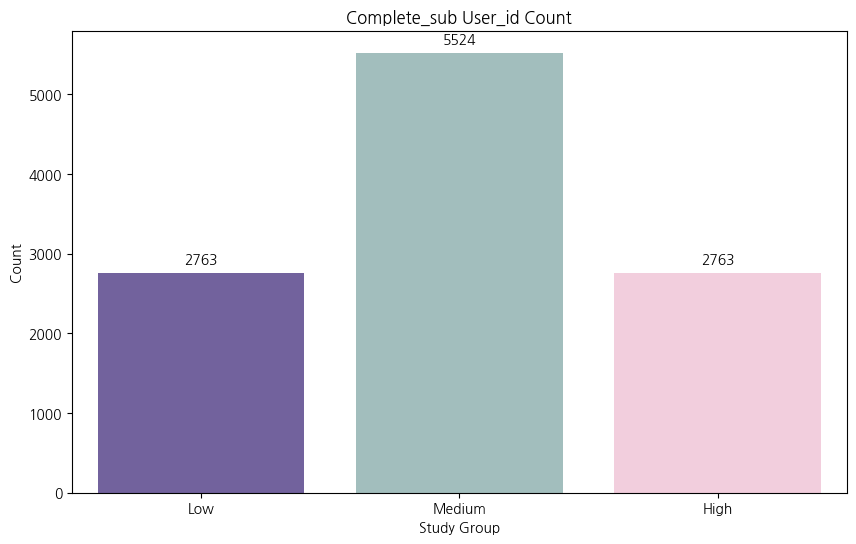

In [174]:
# 유저군 별 인원수 그래프

# 팔레트 설정
palette = {'Low': '#6e58a7', 'Medium': '#9dc3c1', 'High': '#f8c8dc'}

# 그래프 그리기
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='study_group', y='original_user_count', data=study_group_final, order=['Low', 'Medium', 'High'], palette=palette)
plt.title('Complete_sub User_id Count')
plt.xlabel('Study Group')
plt.ylabel('Count')

# 바 그래프 위에 값 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\3851330016.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='study_group', y='renewed_user_count', data=study_group_final, order=['Low', 'Medium', 'High'], palette=palette)


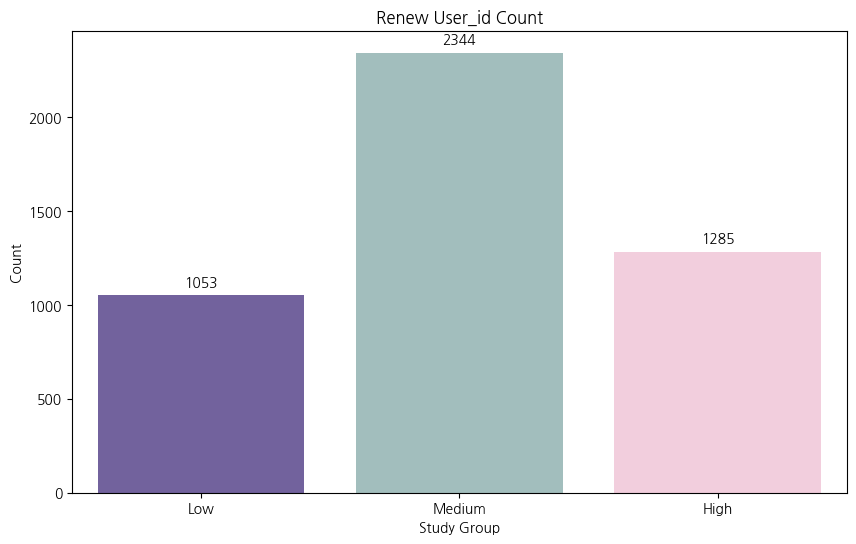

In [175]:
# 유저군 별 인원수 그래프

# 팔레트 설정
palette = {'Low': '#6e58a7', 'Medium': '#9dc3c1', 'High': '#f8c8dc'}

# 그래프 그리기
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='study_group', y='renewed_user_count', data=study_group_final, order=['Low', 'Medium', 'High'], palette=palette)
plt.title('Renew User_id Count')
plt.xlabel('Study Group')
plt.ylabel('Count')

# 바 그래프 위에 값 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\558232620.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='study_group', y='resubscribe_user_count', data=study_group_final, order=['Low', 'Medium', 'High'], palette=palette)


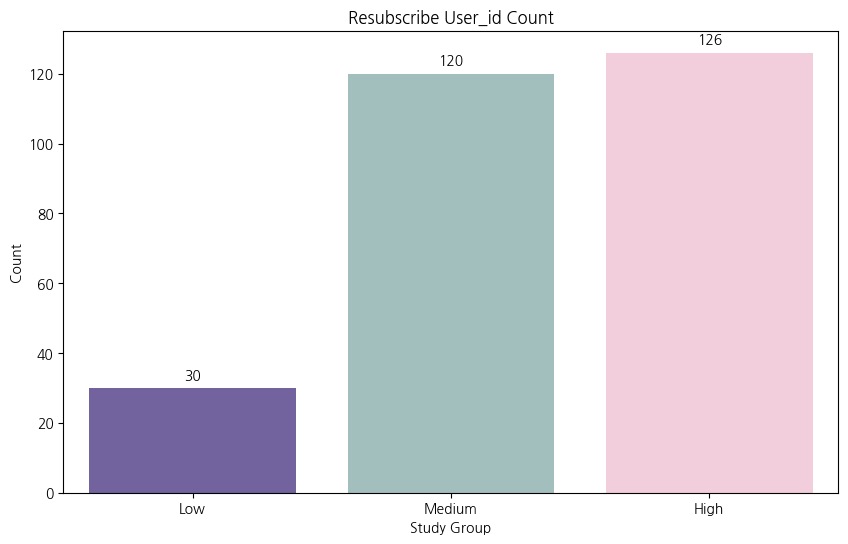

In [176]:
# 재구독 인원수 그래프

# 팔레트 설정
palette = {'Low': '#6e58a7', 'Medium': '#9dc3c1', 'High': '#f8c8dc'}

# 그래프 그리기
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='study_group', y='resubscribe_user_count', data=study_group_final, order=['Low', 'Medium', 'High'], palette=palette)
plt.title('Resubscribe User_id Count')
plt.xlabel('Study Group')
plt.ylabel('Count')

# 바 그래프 위에 값 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

In [177]:
study_group_final

,study_group,original_user_count,renewed_user_count,resubscribe_user_count,original -> renew(%),renew -> resub(%)
0,High,2763,1285,126,46.51,9.81
1,Low,2763,1053,30,38.11,2.85
2,Medium,5524,2344,120,42.43,5.12


C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\4194626851.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='study_group', y='original -> renew(%)', data=study_group_final, order=['Low', 'Medium', 'High'], palette=palette)


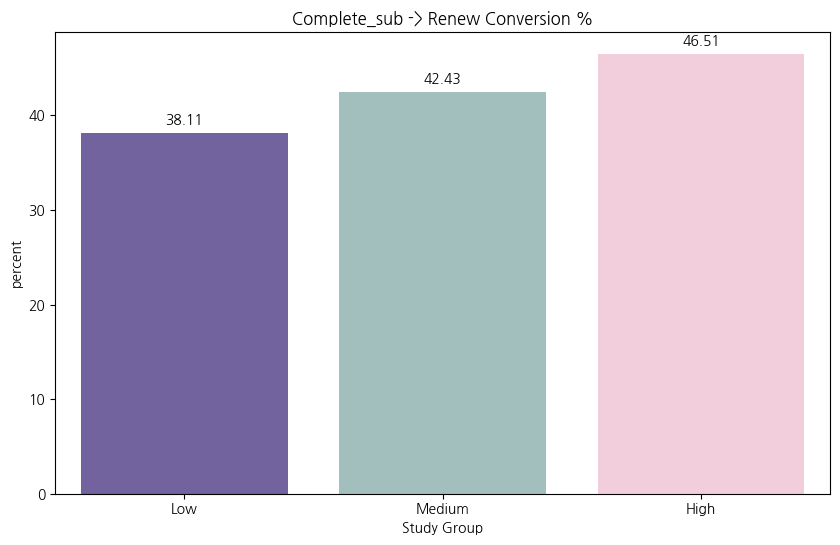

In [178]:
# 정기결제로의 전환율 그래프

# 팔레트 설정
palette = {'Low': '#6e58a7', 'Medium': '#9dc3c1', 'High': '#f8c8dc'}

# 그래프 그리기
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='study_group', y='original -> renew(%)', data=study_group_final, order=['Low', 'Medium', 'High'], palette=palette)
plt.title('Complete_sub -> Renew Conversion %')
plt.xlabel('Study Group')
plt.ylabel('percent')

# 바 그래프 위에 값 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\3197809546.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='study_group', y='renew -> resub(%)', data=study_group_final, order=['Low', 'Medium', 'High'], palette=palette)


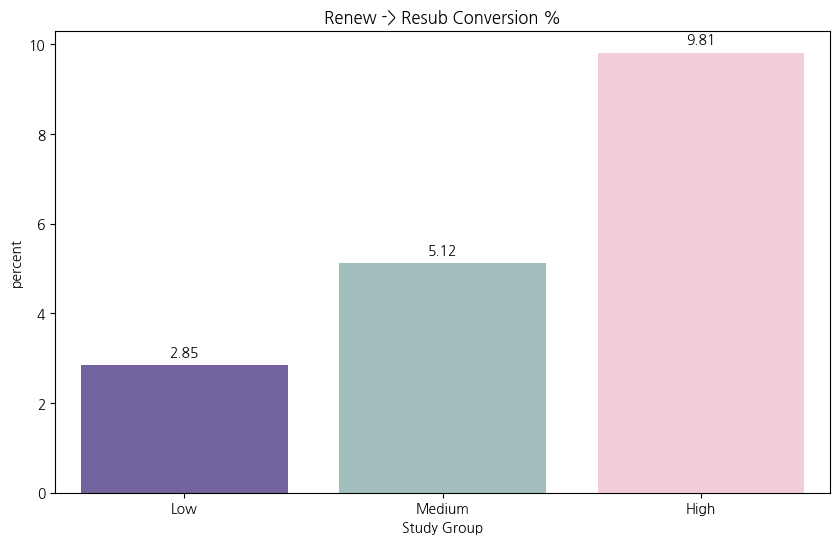

In [179]:
# 정기결제로의 전환율 그래프

# 팔레트 설정
palette = {'Low': '#6e58a7', 'Medium': '#9dc3c1', 'High': '#f8c8dc'}

# 그래프 그리기
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='study_group', y='renew -> resub(%)', data=study_group_final, order=['Low', 'Medium', 'High'], palette=palette)
plt.title('Renew -> Resub Conversion %')
plt.xlabel('Study Group')
plt.ylabel('percent')

# 바 그래프 위에 값 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

### 분석결과

In [180]:
print(f'첫결제를 완료한 유저 수 : {len(unique_first_payment_user_ids)}')
print(f'activate user_id 수: {user_study_time_with_groups['user_id'].nunique()}')
print(f'첫결제 -> 정기결제 전환 user_id 수: {study_group_final['renewed_user_count'].sum()}')
print(f'정기결제 -> 재구독 전환 user_id 수: {len(final_user_ids)}')

첫결제를 완료한 유저 수 : 13875
activate user_id 수: 11050
첫결제 -> 정기결제 전환 user_id 수: 4682
정기결제 -> 재구독 전환 user_id 수: 276


C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\2770339272.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=values, palette=palette)


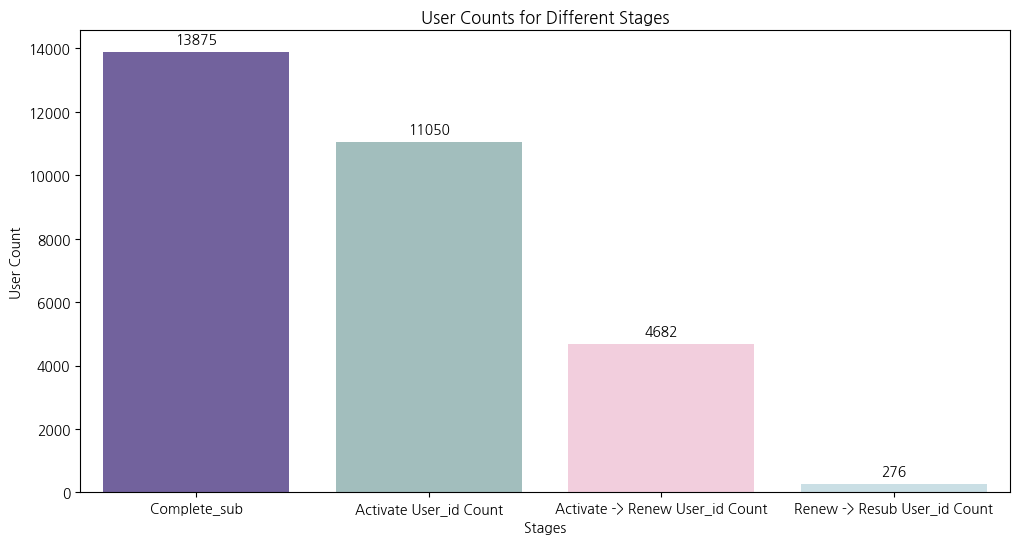

In [409]:
# 위 숫자 그래프
labels = ['Complete_sub', 'Activate User_id Count', 'Activate -> Renew User_id Count', 'Renew -> Resub User_id Count']
values = [
    len(unique_first_payment_user_ids),
    user_study_time_with_groups['user_id'].nunique(),
    study_group_final['renewed_user_count'].sum(),
    len(final_user_ids)
]

# 팔레트 설정
palette = {'Complete_sub': '#6e58a7', 'Activate User_id Count': '#9dc3c1', 'Activate -> Renew User_id Count': '#f8c8dc', 'Renew -> Resub User_id Count' : '#c6e2e9'}

# 그래프 그리기
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=labels, y=values, palette=palette)
plt.title('User Counts for Different Stages')
plt.xlabel('Stages')
plt.ylabel('User Count')

# 바 그래프 위에 값 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

In [182]:
print(f'첫결제 -> 정기결제 전환율 : {round(study_group_final['renewed_user_count'].sum() / user_study_time_with_groups['user_id'].nunique() * 100, 2)}')
print(f'정기결제 -> 재구독 전환율 : {round(len(final_user_ids) / study_group_final['renewed_user_count'].sum() * 100, 2)}')

첫결제 -> 정기결제 전환율 : 42.37
정기결제 -> 재구독 전환율 : 5.89


C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\2535701964.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=values, palette=palette, width=0.4)  # width 파라미터를 사용하여 바의 두께 조절


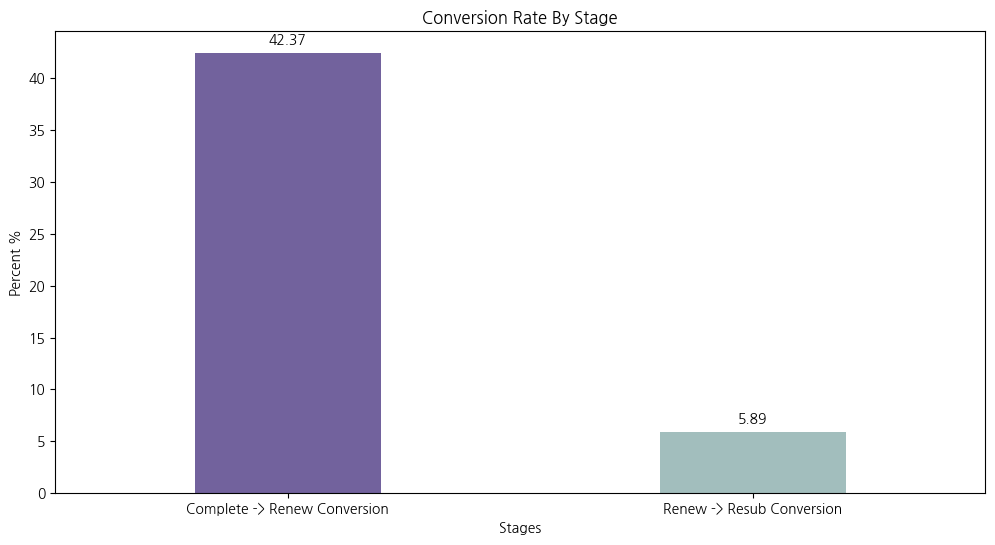

In [183]:
# 전환율 그래프
labels = ['Complete -> Renew Conversion', 'Renew -> Resub Conversion']
values = [
    round(study_group_final['renewed_user_count'].sum() / user_study_time_with_groups['user_id'].nunique() * 100, 2),
    round(len(final_user_ids) / study_group_final['renewed_user_count'].sum() * 100, 2)   
]

# 팔레트 설정
palette = {'Complete -> Renew Conversion': '#6e58a7', 'Renew -> Resub Conversion': '#9dc3c1'}

# 그래프 그리기
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=labels, y=values, palette=palette, width=0.4)  # width 파라미터를 사용하여 바의 두께 조절
plt.title('Conversion Rate By Stage')
plt.xlabel('Stages')
plt.ylabel('Percent %')

# 바 그래프 위에 값 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

## 인기있는/ 없는 무료 레슨의 첫구독 전환율 차이?

#### 무료레슨 추출

In [472]:
enter_lesson_page_finalised_unique.head()

,city,enter_lesson_time,country,device_family,device_type,event_type,language,os_name,user_id,content_id,is_trial,lesson_id,is_free_trial,time_diff,time_diff_seconds,hour
16138,Seoul,2023-03-18 19:42:48.654,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,True,09c8a2d29087cb3d47823acb5f2705e3,NaN,0 days 00:05:42.876000,342.876,19
6147610,Seoul,2023-03-19 00:46:47.244,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,0cf175a1781a8e0020bf6c6bdc80e78a,NaN,0 days 00:01:11.785000,71.785,0
6147611,Seoul,2023-03-19 00:51:34.741,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,0cf175a1781a8e0020bf6c6bdc80e78a,NaN,0 days 00:04:47.497000,287.497,0
1140249,Seoul,2023-03-19 01:29:04.118,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,1e2a48ce24bce72e7d36da219ee9d254,NaN,0 days 00:05:50.893000,350.893,1
6147608,Seoul,2023-03-19 00:45:24.704,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,2ed4b83e65edc2b1efb193aaa3c60cf9,NaN,0 days 01:12:02.068000,4322.068,0


In [427]:
enter_lesson_page_finalised_unique.describe()

,enter_lesson_time,time_diff,time_diff_seconds,hour
count,7852494,7852494,7.852494e+06,7.852494e+06
mean,2023-01-07 20:17:21.373091584,0 days 15:31:14.171259363,5.587417e+04,1.462427e+01
min,2022-01-01 00:56:27.589000,0 days 00:00:30.001000,3.000100e+01,0.000000e+00
25%,2022-07-24 19:21:33.735750144,0 days 00:01:25.004250,8.500425e+01,1.100000e+01
50%,2023-01-26 11:07:25.428499968,0 days 00:03:20.362000,2.003620e+02,1.500000e+01
75%,2023-06-30 00:36:46.983249920,0 days 00:09:22.805000,5.628050e+02,1.900000e+01
max,2023-12-31 23:59:45.192000,722 days 23:20:52.788000,6.246485e+07,2.300000e+01
std,NaN,9 days 22:08:57.636050669,8.573376e+05,5.967829e+00


In [428]:
free_lesson = enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['is_trial'] == True]

In [429]:
free_lesson.describe()

,enter_lesson_time,time_diff,time_diff_seconds,hour
count,45733,45733,4.573300e+04,45733.000000
mean,2023-04-10 03:40:49.739615232,4 days 17:59:36.952291540,4.103770e+05,14.247874
min,2022-12-09 12:17:44.385000,0 days 00:00:30.002000,3.000200e+01,0.000000
25%,2023-01-16 14:01:27.276000,0 days 00:02:18.880000,1.388800e+02,10.000000
50%,2023-01-31 23:28:55.953999872,0 days 00:04:16.827000,2.568270e+02,15.000000
75%,2023-07-12 13:37:08.105999872,0 days 00:10:30.702000,6.307020e+02,19.000000
max,2023-12-31 22:32:28.649000,677 days 02:50:45.072000,5.850305e+07,23.000000
std,NaN,35 days 21:05:30.077334546,3.099930e+06,6.270681


In [430]:
print(free_lesson['enter_lesson_time'].min())
print(free_lesson['enter_lesson_time'].max())

2022-12-09 12:17:44.385000
2023-12-31 22:32:28.649000


In [431]:
free_lesson = free_lesson.drop_duplicates(subset=['content_id', 'lesson_id'])

In [432]:
print(free_lesson['content_id'].nunique())
print(free_lesson['content_id'].unique())
print(free_lesson['lesson_id'].nunique())
print(free_lesson['lesson_id'].unique())

5
['61b6463287573f00de13a930805a52d6' 'c269eb6df3a374b464f7c18f12fa398f'
 '445fac33232adcb3d1cdab7d8a579430' '710ffb5be9f89772b7baa9f62c9c8805'
 'db43a841c994231e2795d4df8931af50']
32
['09c8a2d29087cb3d47823acb5f2705e3' '6e3afbeb4942c6c29038321e5995f4f1'
 '70cb48c6327ced134821d9494f53cc60' 'b734f43b5123f8bdbf7d8f865bd3eacf'
 'db421b66bfd27eccd0e862e30b4de1be' '2ed4b83e65edc2b1efb193aaa3c60cf9'
 'c2b88e494ee633b334aa081cac7b1f02' '7e0f6aae886368ef9fa97007a8e9f7ac'
 '0cf175a1781a8e0020bf6c6bdc80e78a' '1e2a48ce24bce72e7d36da219ee9d254'
 '3ae4d4504b620370687e58e0a33cf22d' 'bc72ce5b1d619166b28d2e990f8d9f49'
 'c84ce096d3407c9ce4eebd380df44dbf' 'ce99776e0779bc82754a1fc8bfb719d1'
 'eb40ff18855f20f7cd2d55dbc48b49ae' 'f024a88c9328cb19413c04f4cd51f979'
 'd1e93c9dc08267efab31849bc6083854' 'e7783a0f86ae5130b0906f070386667f'
 '582f0dd769db16a3d920fd7916090efb' '7e6cf964f2cb6622bfa92df4ace0d044'
 '76504988acfeb975dbd954b3377c9c24' 'f22ea5dc431035305e705552bbc4f45b'
 '35d9d157fab3acc93db1d0ed639abcc4'

- 구독하지 않아도 들을 수 있는 lesson 32개. content_id 5개에 귀속

In [433]:
free_lesson['content_id'].value_counts()

content_id
61b6463287573f00de13a930805a52d6    15
c269eb6df3a374b464f7c18f12fa398f     8
445fac33232adcb3d1cdab7d8a579430     7
710ffb5be9f89772b7baa9f62c9c8805     1
db43a841c994231e2795d4df8931af50     1
Name: count, dtype: int64

In [434]:
print(enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['content_id'] == '61b6463287573f00de13a930805a52d6']['lesson_id'].nunique())
print(enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['content_id'] == 'c269eb6df3a374b464f7c18f12fa398f']['lesson_id'].nunique())
print(enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['content_id'] == '445fac33232adcb3d1cdab7d8a579430']['lesson_id'].nunique())
print(enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['content_id'] == '710ffb5be9f89772b7baa9f62c9c8805']['lesson_id'].nunique())
print(enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['content_id'] == 'db43a841c994231e2795d4df8931af50']['lesson_id'].nunique())

21
116
53
17
78


- 무료 레슨으로만 구성된 콘텐트는 없음을 확인

In [435]:
# free_lesson의 unique lesson_id들
free_lesson_unique = free_lesson['lesson_id'].unique()

# enter_lesson_page_finalised_unique_finalised_uniquee에서 각 lesson_id가 등장하는 횟수 계산
lesson_counts = enter_lesson_page_finalised_unique['lesson_id'].isin(free_lesson_unique).sum()

print(f"해당 lesson_id들이 enter_lesson_page_finalised_unique에 등장한 횟수: {lesson_counts}")

해당 lesson_id들이 enter_lesson_page_finalised_unique에 등장한 횟수: 294700


In [436]:
# free_lesson의 unique content_id들
free_content_unique = free_lesson['content_id'].unique()

# enter_lesson_page_finalised_unique에서 각 lesson_id가 등장하는 횟수 계산
content_counts = enter_lesson_page_finalised_unique['content_id'].isin(free_content_unique).sum()

print(f"해당 content_id들이 enter_lesson_page_finalised_unique에 등장한 횟수: {content_counts}")

해당 content_id들이 enter_lesson_page_finalised_unique에 등장한 횟수: 933555


- 각 무료 레슨들이 몇 번 등장했나?

In [437]:
# free_lesson_unique를 DataFrame으로 변환 (예시로 lesson_id 열이 있다고 가정)
free_lesson_unique_df = pd.DataFrame(free_lesson_unique, columns=['lesson_id'])

# enter_lesson_page_finalised_unique에서 lesson_id의 등장 횟수 계산
lesson_counts = enter_lesson_page_finalised_unique['lesson_id'].value_counts().reset_index()
lesson_counts.columns = ['lesson_id', 'count']

# free_lesson_unique와 병합하여 결과 확인
result = pd.merge(free_lesson_unique_df, lesson_counts, on='lesson_id', how='left')

# NaN 값을 0으로 대체 (free_lesson_unique에 있지만 enter_lesson_page_finalised_unique에 없는 lesson_id의 경우)
result['count'] = result['count'].fillna(0)

# 결과 출력
result.head()

,lesson_id,count
0,09c8a2d29087cb3d47823acb5f2705e3,14916
1,6e3afbeb4942c6c29038321e5995f4f1,13536
2,70cb48c6327ced134821d9494f53cc60,13428
3,b734f43b5123f8bdbf7d8f865bd3eacf,13589
4,db421b66bfd27eccd0e862e30b4de1be,19458


In [438]:
# result를 count 기준으로 내림차순
result_sorted = result.sort_values(by='count', ascending=False).reset_index(drop=True)

# 상위 5개와 하위 5개 레슨
top_5_lessons = result_sorted.head(5)
bottom_5_lessons = result_sorted.tail(5)

# 결과 출력
print("상위 5개 레슨:")
print(top_5_lessons)

print("\n하위 5개 레슨:")
print(bottom_5_lessons)

상위 5개 레슨:
                          lesson_id  count
0  2ed4b83e65edc2b1efb193aaa3c60cf9  32773
1  db421b66bfd27eccd0e862e30b4de1be  19458
2  09c8a2d29087cb3d47823acb5f2705e3  14916
3  b734f43b5123f8bdbf7d8f865bd3eacf  13589
4  6e3afbeb4942c6c29038321e5995f4f1  13536

하위 5개 레슨:
                           lesson_id  count
27  ce0bfeb7fb1259c588f437d48ab2690c   4415
28  d1e93c9dc08267efab31849bc6083854   4154
29  f22ea5dc431035305e705552bbc4f45b   2877
30  747df4b0ff099f7efb370b1171c08340   2707
31  144682f4648f81de8e6aabd11b92105e   1804


- is_trial이 True에서 False로의 전환(두 값 모두를 갖고 있다)됐다는 의미는 구독을 했다는 의미

#### 회원가입 -> 무료 레슨 수강 -> 첫결제
- 무료 레슨 수강한 user_id -> 11,073
- is_trial True, False를 모두 가진 유저 -> 4,451
- 무료 레슨만 듣고 이탈한 사람(is_trial이 True가 끝) -> 6,622

In [470]:
# enter_lesson_page_finalised_unique_finalised_unique에서 is_trial이 True인 user_id를 추출
# enter_lesson_page_finalised_unique에서 is_trial이 True인 user_id를 추출
trial_user_ids = enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['is_trial'] == True]['user_id'].unique()

# 결과 출력
len(trial_user_ids)


11073

In [471]:
# is_trial이 True인 user_id 추출
true_trial_user_ids = set(enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['is_trial'] == True]['user_id'].unique())

# is_trial이 False인 user_id 추출
false_trial_user_ids = set(enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['is_trial'] == False]['user_id'].unique())

# 두 집합의 교집합 구하기
both_trial_user_ids = true_trial_user_ids.intersection(false_trial_user_ids)

# 결과 출력
print(len(both_trial_user_ids))

4451


In [474]:
both_trial_user_ids

{'f421e0af8e608c1dea9ebd04efb69d49',
 'b23edee425598a43e60d61bf2786c0d4',
 'e3ee91b84d2ce862cdf147b5702837b1',
 '8be6a8bbad261bbef55f0dea6a63c067',
 'e70fafe4ef1252b58d3b6584fd834b8b',
 '61888e8e8ca7fac336fb1cc619b1ee36',
 '77ea5b4a017ad2c3f601b6b642769222',
 '068d21d3d1e9a83e77330bdac26b13a6',
 'cfff3274dccc0d343f32c5f01c4fd5f2',
 '98989250326350de96a0ba2f374e096a',
 '605706991f2fd0be04f5b0c520cbe36b',
 '6bdb980aa28fd9912bd4954d0639ffad',
 '077d5f64df2d6f38b85eb80a8d489a8e',
 '66dba34846110a898c4e32e4fc122735',
 '5c620a1308e5e1a0813ad0582ceffad9',
 '707dbab83e79f1e6811bacebc47a87c1',
 '9393c8b03cfa45f7bdf9fcf2f3f8081b',
 '3b637ab897110d6158955854603920c6',
 'f321ab1f25b62174d85d074e528f0552',
 '32b8a9318616e44e8038cf7ec7c498ee',
 'ccbfec90d3516bcd3cccda7fab5d7b9b',
 '1b58b55b6663831a483a93cb2f33ef47',
 '7e4c83efcc0783da316b5e563e06b417',
 '2c3b827b322cb74f156efc4cf73e62bd',
 '7e5c26f37f621f810f3fcf872a7d0bec',
 '1a1ea4df978d10b248d6359f1f7d97f9',
 '04a9652d030a5ee9e80ba5dea1b350de',
 

In [446]:
# 테스트
one_id = enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['user_id'] == 'e70fafe4ef1252b58d3b6584fd834b8b']

In [447]:
# is_trial이 False일 때 enter_lesson_time의 최소값 찾기
min_enter_lesson_time_false = one_id[one_id['is_trial'] == False]['enter_lesson_time'].min()

# is_trial이 True일 때 enter_lesson_time의 최대값 찾기
max_enter_lesson_time_true = one_id[one_id['is_trial'] == True]['enter_lesson_time'].max()

# 결과 출력
print(f"is_trial이 False일 때 enter_lesson_time의 최소값: {min_enter_lesson_time_false}")
print(f"is_trial이 True일 때 enter_lesson_time의 최대값: {max_enter_lesson_time_true}")

is_trial이 False일 때 enter_lesson_time의 최소값: 2023-05-24 16:24:59.855000
is_trial이 True일 때 enter_lesson_time의 최대값: 2023-01-23 22:27:14.352000


- 무료 레슨을 듣고 구독으로 넘어간 사람 1,919명 (아래 코드결과)
- is_trial True, False가 모두 있는 사람에 한해서, False의 최소 이벤트 타임 - True의 최대 이벤트타임을 했을 때 양수인 사람
- 첫 결제 이후 만료가 되면 구독 중이 아니기 때문

In [448]:
# is_trial이 True인 행의 enter_lesson_time의 최대값과 False인 행의 enter_lesson_time의 최소값을 계산
trial_max_times = enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['is_trial'] == True].groupby('user_id')['enter_lesson_time'].max()
non_trial_min_times = enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['is_trial'] == False].groupby('user_id')['enter_lesson_time'].min()

# both_trial_user_ids에 있는 user_id에 대해 필터링
trial_max_times = trial_max_times[trial_max_times.index.isin(both_trial_user_ids)]
non_trial_min_times = non_trial_min_times[non_trial_min_times.index.isin(both_trial_user_ids)]

# 양수와 음수 개수를 저장할 변수 초기화
positive_count = 0
negative_count = 0

# 양수가 나오는 user_id를 저장할 리스트 초기화
positive_user_ids = []

# both_trial_user_ids에 있는 모든 user_id에 대해 반복
for user_id in both_trial_user_ids:
    if user_id in trial_max_times.index and user_id in non_trial_min_times.index:
        max_enter_lesson_time_true = trial_max_times[user_id]
        min_enter_lesson_time_false = non_trial_min_times[user_id]
        
        # min_enter_lesson_time_false - max_enter_lesson_time_true 계산
        time_difference = min_enter_lesson_time_false - max_enter_lesson_time_true
        
        # 양수와 음수 개수 세기 및 양수인 경우 user_id 저장
        if time_difference > pd.Timedelta(0):
            positive_count += 1
            positive_user_ids.append(user_id)
        else:
            negative_count += 1

# 결과 출력
print(f"양수가 나오는 user_id 개수: {positive_count}")
print(f"음수가 나오는 user_id 개수: {negative_count}")

양수가 나오는 user_id 개수: 1919
음수가 나오는 user_id 개수: 2532


- 1919명이 무료 레슨 수강 후 현재 구독 중인 유저

In [450]:
# positive_user_ids들이 is_trial이 True였을 때 들은 lesson_id 추출
# positive_user_ids가 is_trial이 True였을 때 들은 lesson_id 추출
positive_lessons_true_trial = enter_lesson_page_finalised_unique[
    (enter_lesson_page_finalised_unique['user_id'].isin(positive_user_ids)) &
    (enter_lesson_page_finalised_unique['is_trial'] == True)
]['lesson_id'].unique()

# 결과 출력
print("positive_user_ids가 is_trial이 True였을 때 들은 lesson_id:")
print(positive_lessons_true_trial)

positive_user_ids가 is_trial이 True였을 때 들은 lesson_id:
['09c8a2d29087cb3d47823acb5f2705e3' '6e3afbeb4942c6c29038321e5995f4f1'
 '70cb48c6327ced134821d9494f53cc60' 'b734f43b5123f8bdbf7d8f865bd3eacf'
 'db421b66bfd27eccd0e862e30b4de1be' 'c2b88e494ee633b334aa081cac7b1f02'
 '0cf175a1781a8e0020bf6c6bdc80e78a' 'c84ce096d3407c9ce4eebd380df44dbf'
 'ce99776e0779bc82754a1fc8bfb719d1' 'eb40ff18855f20f7cd2d55dbc48b49ae'
 'f024a88c9328cb19413c04f4cd51f979' '7e0f6aae886368ef9fa97007a8e9f7ac'
 '1e2a48ce24bce72e7d36da219ee9d254' '2ed4b83e65edc2b1efb193aaa3c60cf9'
 '3ae4d4504b620370687e58e0a33cf22d' 'bc72ce5b1d619166b28d2e990f8d9f49'
 '10459dde9f512f1a65a7bd4d4c67b5db' '76504988acfeb975dbd954b3377c9c24'
 'ce0bfeb7fb1259c588f437d48ab2690c' 'd1e93c9dc08267efab31849bc6083854'
 'e7783a0f86ae5130b0906f070386667f' 'f22ea5dc431035305e705552bbc4f45b'
 '35d9d157fab3acc93db1d0ed639abcc4' '582f0dd769db16a3d920fd7916090efb'
 '7e6cf964f2cb6622bfa92df4ace0d044' '83c74d5802b04a1a50aa28b7bf8a5354'
 '9dfd989df3ef32c5c17129b

In [476]:
# positive_user_ids가 is_trial이 True였을 때 들은 lesson_id들과 개수 추출
positive_lessons_true_trial = enter_lesson_page_finalised_unique[
    (enter_lesson_page_finalised_unique['user_id'].isin(positive_user_ids)) &
    (enter_lesson_page_finalised_unique['is_trial'] == True)
]

# 각 user_id별로 lesson_id와 그 개수를 그룹화하여 추출
lesson_counts = positive_lessons_true_trial.groupby(['user_id', 'lesson_id']).size().reset_index(name='count')

# lesson_counts를 user_id로 그룹화하여 각 user_id별로 lesson_id와 그 개수를 리스트로 저장
grouped_lesson_counts = lesson_counts.groupby('user_id').apply(lambda x: x[['lesson_id', 'count']].values.tolist()).reset_index(name='lessons')

# lessons 열을 lesson_id와 count 열로 분리
grouped_lesson_counts[['lesson_ids', 'counts']] = grouped_lesson_counts['lessons'].apply(lambda x: pd.Series([list(zip(*x))[0], list(zip(*x))[1]]))

# lessons 열 제거
grouped_lesson_counts = grouped_lesson_counts.drop(columns=['lessons'])

# lesson_ids의 개수를 세는 열 추가
grouped_lesson_counts['lesson_ids_count'] = grouped_lesson_counts['lesson_ids'].apply(len)

# counts 열 제거
grouped_lesson_counts = grouped_lesson_counts.drop(columns=['counts'])

# 결과 출력
print("각 positive_user_ids가 is_trial이 True였을 때 들은 lesson_id들과 개수:")
grouped_lesson_counts.head(1)

각 positive_user_ids가 is_trial이 True였을 때 들은 lesson_id들과 개수:


C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\514455653.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_lesson_counts = lesson_counts.groupby('user_id').apply(lambda x: x[['lesson_id', 'count']].values.tolist()).reset_index(name='lessons')


,user_id,lesson_ids,lesson_ids_count
0,0000572f2ba8079bcefd2760b632e820,"(09c8a2d29087cb3d47823acb5f2705e3, 6e3afbeb4942c6c29038321e5995f4f1, 70cb48c6327ced134821d9494f53cc60, b734f43b5123f8bdbf7d8f865bd3eacf, db421b66bfd27eccd0e862e30b4de1be)",5


- 각 lesson_id들이 몇 번 등장했나

In [475]:
# lesson_ids를 펼쳐서 각 lesson_id의 빈도 계산
all_lesson_ids = [lesson_id for sublist in grouped_lesson_counts['lesson_ids'] for lesson_id in sublist]
lesson_id_counts = pd.Series(all_lesson_ids).value_counts().reset_index()
lesson_id_counts.columns = ['lesson_id', 'count']

# 결과 출력
print("각 lesson_id들이 lesson_ids에서 몇 번 등장했는지:")
lesson_id_counts.head(1)

각 lesson_id들이 lesson_ids에서 몇 번 등장했는지:


,lesson_id,count
0,db421b66bfd27eccd0e862e30b4de1be,818


In [454]:
# 각 lesson_id가 enter_lesson_page_finalised_unique에서 처음 등장한 시간 계산
first_appearance_times = enter_lesson_page_finalised_unique.groupby('lesson_id')['enter_lesson_time'].min().reset_index()
first_appearance_times.columns = ['lesson_id', 'first_appearance_time']

# lesson_id_counts와 first_appearance_times를 병합하여 새로운 열 추가
lesson_id_counts_time = pd.merge(lesson_id_counts, first_appearance_times, on='lesson_id', how='left')
lesson_id_counts_time

,lesson_id,count,first_appearance_time
0,db421b66bfd27eccd0e862e30b4de1be,818,2022-07-20 17:48:29.880
1,09c8a2d29087cb3d47823acb5f2705e3,580,2022-07-20 16:27:51.104
2,2ed4b83e65edc2b1efb193aaa3c60cf9,570,2022-07-20 16:19:44.729
3,b734f43b5123f8bdbf7d8f865bd3eacf,542,2022-07-20 17:28:23.241
4,6e3afbeb4942c6c29038321e5995f4f1,531,2022-07-20 17:33:00.736
5,70cb48c6327ced134821d9494f53cc60,498,2022-07-20 17:36:14.529
6,0cf175a1781a8e0020bf6c6bdc80e78a,421,2022-07-20 17:44:26.144
7,7e0f6aae886368ef9fa97007a8e9f7ac,370,2022-09-02 15:11:46.705
8,ce99776e0779bc82754a1fc8bfb719d1,330,2022-07-20 18:26:14.182
9,eb40ff18855f20f7cd2d55dbc48b49ae,327,2022-07-20 17:28:08.492


- 처음 레슨이 등장한 시기와 무료 레슨 시청 횟수는 큰 연관이 없어 보임

#### is_trial이 True에서 False로 넘어가지 않은 True만 추출

In [477]:
# both_trial_user_ids -> is_trial True, False 교집합
trial_user = enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['is_trial'] == True]

# is_trial이 True인 user_id 중 both_trial_user_ids에 해당하지 않은 유저들만 필터링
real_true_trial_users = trial_user[~trial_user['user_id'].isin(both_trial_user_ids)]

# 결과 출력
print("is_trial이 True인 user_id 중 both_trial_user_ids에 해당하지 않은 유저들:")
real_true_trial_users.head(1)

is_trial이 True인 user_id 중 both_trial_user_ids에 해당하지 않은 유저들:


,city,enter_lesson_time,country,device_family,device_type,event_type,language,os_name,user_id,content_id,is_trial,lesson_id,is_free_trial,time_diff,time_diff_seconds,hour
1511836,Seoul,2023-01-16 20:42:22.443,South Korea,Samsung Phone,Samsung Galaxy A22 5G,enter.lesson_page,Korean,Chrome,0001435bc6c0c0f05315192f89275425,61b6463287573f00de13a930805a52d6,True,2ed4b83e65edc2b1efb193aaa3c60cf9,NaN,0 days 10:41:23.674000,38483.674,20


In [478]:
real_true_trial_users['user_id'].nunique()
# 처음 전처리와 동일한 수인 것 확인

6622

In [479]:
# real_true_trial_users의 user_id를 그룹바이, 각 lesson_id들과 lesson_id의 개수

# 각 user_id별로 lesson_id와 그 개수를 그룹화하여 추출
lesson_counts = real_true_trial_users.groupby(['user_id', 'lesson_id']).size().reset_index(name='count')

# lesson_counts를 user_id로 그룹화하여 각 user_id별로 lesson_id와 그 개수를 리스트로 저장
grouped_lesson_counts_real_true = lesson_counts.groupby('user_id').apply(lambda x: x[['lesson_id', 'count']].values.tolist()).reset_index(name='lessons')

# lessons 열을 lesson_id와 count 열로 분리
grouped_lesson_counts_real_true[['lesson_ids', 'counts']] = grouped_lesson_counts_real_true['lessons'].apply(lambda x: pd.Series([list(zip(*x))[0], list(zip(*x))[1]]))

# counts 열을 lesson_ids의 고유한 값의 개수로 수정
grouped_lesson_counts_real_true['counts'] = grouped_lesson_counts_real_true['lesson_ids'].apply(lambda x: pd.Series(x).nunique())

# lessons 열 제거
grouped_lesson_counts_real_true = grouped_lesson_counts_real_true.drop(columns=['lessons'])

# 결과 출력
print("각 user_id별로 lesson_id와 그 개수를 그룹화한 결과:")
grouped_lesson_counts_real_true.head()

C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\3478169115.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_lesson_counts_real_true = lesson_counts.groupby('user_id').apply(lambda x: x[['lesson_id', 'count']].values.tolist()).reset_index(name='lessons')


각 user_id별로 lesson_id와 그 개수를 그룹화한 결과:


,user_id,lesson_ids,counts
0,0001435bc6c0c0f05315192f89275425,"(2ed4b83e65edc2b1efb193aaa3c60cf9, db421b66bfd27eccd0e862e30b4de1be)",2
1,0003b028a745bdfda9e88539424248af,"(c2b88e494ee633b334aa081cac7b1f02,)",1
2,00046309229135e7aac86ec4c0d35009,"(7e0f6aae886368ef9fa97007a8e9f7ac,)",1
3,000d75dda2b964f4733c498ef6c4c4f9,"(2ed4b83e65edc2b1efb193aaa3c60cf9, db421b66bfd27eccd0e862e30b4de1be)",2
4,001016699f7dcd6e776cb3cff16c26d1,"(c2b88e494ee633b334aa081cac7b1f02,)",1


In [ ]:
# lesson_ids를 펼쳐서 각 lesson_id의 빈도 계산
all_lesson_ids = [lesson_id for sublist in grouped_lesson_counts_real_true['lesson_ids'] for lesson_id in sublist]
lesson_id_counts_real_true = pd.Series(all_lesson_ids).value_counts().reset_index()
lesson_id_counts_real_true.columns = ['lesson_id', 'count']

# 결과 출력
print("각 lesson_id들이 lesson_ids에서 몇 번 등장했는지:")
lesson_id_counts_real_true.head()

각 lesson_id들이 lesson_ids에서 몇 번 등장했는지:


,lesson_id,count
0,db421b66bfd27eccd0e862e30b4de1be,3099
1,2ed4b83e65edc2b1efb193aaa3c60cf9,2071
2,09c8a2d29087cb3d47823acb5f2705e3,1771
3,b734f43b5123f8bdbf7d8f865bd3eacf,1478
4,6e3afbeb4942c6c29038321e5995f4f1,1223


In [481]:
lesson_id_counts.head()

,lesson_id,count
0,db421b66bfd27eccd0e862e30b4de1be,818
1,09c8a2d29087cb3d47823acb5f2705e3,580
2,2ed4b83e65edc2b1efb193aaa3c60cf9,570
3,b734f43b5123f8bdbf7d8f865bd3eacf,542
4,6e3afbeb4942c6c29038321e5995f4f1,531


## 조건 재설정 후 분석
- 첫결제로 진행된 유저, 진행하지 않은 유저 모두 마지막 레슨 기준
- 마지막 무료레슨이 첫결제로 이어지는 데 큰 영향을 주었을 것으로 추측
- paid_amount 는 평균으로

In [ ]:
# positive_user_ids가 is_trial이 True였을 때 들은 lesson_id들과 enter_lesson_time 추출
positive_lessons_true_trial = enter_lesson_page_finalised_unique[
    (enter_lesson_page_finalised_unique['user_id'].isin(positive_user_ids)) &
    (enter_lesson_page_finalised_unique['is_trial'] == True)
]

# 각 user_id별로 enter_lesson_time이 가장 늦은 lesson_id 추출
latest_lessons = positive_lessons_true_trial.loc[positive_lessons_true_trial.groupby('user_id')['enter_lesson_time'].idxmax()]

# 각 user_id별로 lesson_id와 그 개수를 그룹화하여 추출
lesson_counts = latest_lessons.groupby(['user_id', 'lesson_id']).size().reset_index(name='count')

# 결과 출력
print("각 positive_user_ids가 is_trial이 True였을 때 enter_lesson_time이 가장 늦은 lesson_id와 개수:")
lesson_counts

각 positive_user_ids가 is_trial이 True였을 때 enter_lesson_time이 가장 늦은 lesson_id와 개수:


,user_id,lesson_id,count
0,0000572f2ba8079bcefd2760b632e820,70cb48c6327ced134821d9494f53cc60,1
1,002f6daf440e1880ec37a91702c9aa28,c2b88e494ee633b334aa081cac7b1f02,1
2,0045c6cadae2a7e9f57704258fc0ab30,c2b88e494ee633b334aa081cac7b1f02,1
3,008ec6fc8183f2adec644977d9c3d680,f024a88c9328cb19413c04f4cd51f979,1
4,0096e351e1be93a968d368749bae433d,eb40ff18855f20f7cd2d55dbc48b49ae,1
...,...,...,...
1914,ff938d67838a068d705e255117fa242b,3ae4d4504b620370687e58e0a33cf22d,1
1915,ff9e567b9c026b9b08cd110dd9e73716,7e0f6aae886368ef9fa97007a8e9f7ac,1
1916,ffa48d58e920e74519c18e0e9980277a,0cf175a1781a8e0020bf6c6bdc80e78a,1
1917,ffb441d36119cb52c19cb69c0d661480,0cf175a1781a8e0020bf6c6bdc80e78a,1


In [352]:
# lesson_id 별 개수
lesson_id_counts = lesson_counts.groupby('lesson_id')['count'].sum().reset_index(name='total_count')
lesson_id_counts = lesson_id_counts.sort_values(by = 'total_count', ascending = False ).reset_index(drop = True)

# 결과 출력
print("각 lesson_id의 개수:")
lesson_id_counts

각 lesson_id의 개수:


,lesson_id,total_count
0,2ed4b83e65edc2b1efb193aaa3c60cf9,288
1,f024a88c9328cb19413c04f4cd51f979,198
2,7e0f6aae886368ef9fa97007a8e9f7ac,192
3,db421b66bfd27eccd0e862e30b4de1be,181
4,c2b88e494ee633b334aa081cac7b1f02,157
5,e7783a0f86ae5130b0906f070386667f,127
6,0cf175a1781a8e0020bf6c6bdc80e78a,110
7,70cb48c6327ced134821d9494f53cc60,71
8,09c8a2d29087cb3d47823acb5f2705e3,61
9,6e3afbeb4942c6c29038321e5995f4f1,55


In [363]:
# real_true_trial_users 별로 enter_lesson_time이 가장 늦은 lesson_id 추출
latest_lessons_real_true_trial = real_true_trial_users.loc[real_true_trial_users.groupby('user_id')['enter_lesson_time'].idxmax()]

# user_id와 lesson_id 열만 남기고 나머지 열 삭제
latest_lessons_real_true_trial = latest_lessons_real_true_trial[['user_id', 'lesson_id']]

# 결과 출력
print("각 real_true_trial_user 별 enter_lesson_time이 가장 늦은 lesson_id (user_id와 lesson_id 열만):")
latest_lessons_real_true_trial

각 real_true_trial_user 별 enter_lesson_time이 가장 늦은 lesson_id (user_id와 lesson_id 열만):


,user_id,lesson_id
77262,0001435bc6c0c0f05315192f89275425,db421b66bfd27eccd0e862e30b4de1be
14350959,0003b028a745bdfda9e88539424248af,c2b88e494ee633b334aa081cac7b1f02
20703318,00046309229135e7aac86ec4c0d35009,7e0f6aae886368ef9fa97007a8e9f7ac
1008782,000d75dda2b964f4733c498ef6c4c4f9,2ed4b83e65edc2b1efb193aaa3c60cf9
19038668,001016699f7dcd6e776cb3cff16c26d1,c2b88e494ee633b334aa081cac7b1f02
...,...,...
1839675,ffbeea175372bf2c20f9d2c8ddb44228,09c8a2d29087cb3d47823acb5f2705e3
4572249,ffd48cbfb86525d94135302eaebaf218,09c8a2d29087cb3d47823acb5f2705e3
3080659,ffdbd606e33141fb5d7c7ad581d421c9,adfe4e8b1dc5d9f2e4b76e4bc8ee221c
1614186,ffe1379e0722ca66ce7d093e0d9d9dcd,db421b66bfd27eccd0e862e30b4de1be


In [367]:
import pandas as pd

# real_true_trial_users 별로 enter_lesson_time이 가장 늦은 lesson_id 추출
latest_lessons_real_true_trial = real_true_trial_users.loc[real_true_trial_users.groupby('user_id')['enter_lesson_time'].idxmax()]

# user_id와 lesson_id 열만 남기고 나머지 열 삭제
latest_lessons_real_true_trial = latest_lessons_real_true_trial[['user_id', 'lesson_id']]

# lesson_id를 그룹화하여 각 레슨을 들은 user_id의 수를 세기
lesson_id_user_counts_real_true_trial = latest_lessons_real_true_trial.groupby('lesson_id')['user_id'].nunique().reset_index(name='user_count')
lesson_id_real_true_trial_counts = lesson_id_user_counts_real_true_trial.sort_values(by = 'user_count', ascending = False).reset_index(drop = True)

# 결과 출력
print("각 lesson_id를 들은 user_id의 수:")
lesson_id_real_true_trial_counts

각 lesson_id를 들은 user_id의 수:


,lesson_id,user_count
0,2ed4b83e65edc2b1efb193aaa3c60cf9,1296
1,db421b66bfd27eccd0e862e30b4de1be,1138
2,c2b88e494ee633b334aa081cac7b1f02,848
3,7e0f6aae886368ef9fa97007a8e9f7ac,417
4,09c8a2d29087cb3d47823acb5f2705e3,331
5,b734f43b5123f8bdbf7d8f865bd3eacf,291
6,f024a88c9328cb19413c04f4cd51f979,272
7,70cb48c6327ced134821d9494f53cc60,270
8,6e3afbeb4942c6c29038321e5995f4f1,222
9,0cf175a1781a8e0020bf6c6bdc80e78a,163


In [377]:
# lesson_id_counts # lesson_id_real_true_trial_counts

# lesson_id_real_true_trial_counts의 count 컬럼의 이름을 not_convert_to_payment_user로 변경
lesson_id_real_true_trial_counts = lesson_id_real_true_trial_counts.rename(columns={'user_count': 'not_convert_to_payment_user'})

# lesson_id_counts의 count 컬럼 이름을 conver_to_payment_user로 변경
lesson_id_counts = lesson_id_counts.rename(columns={'total_count': 'convert_to_payment_user'})

# lesson_id를 기준으로 두 데이터를 합치기
merged_lesson_id_counts = pd.merge(lesson_id_counts, lesson_id_real_true_trial_counts, on='lesson_id', how='outer')

# total_user_count 컬럼추가
merged_lesson_id_counts['total_user_count'] = merged_lesson_id_counts['not_convert_to_payment_user'] + merged_lesson_id_counts['convert_to_payment_user']

# 전환율 컬럼 추가. round(convert_to_payment_user / (not_conver_to_payment_user + convert_to_payment_user) * 100, 2)
merged_lesson_id_counts['conversion_percent'] = round(
    merged_lesson_id_counts['convert_to_payment_user'] / 
    (merged_lesson_id_counts['not_convert_to_payment_user'] + merged_lesson_id_counts['convert_to_payment_user']) * 100, 2)

# 전환율이 높은 레슨부터 내림차순
free_lesson_conversion_df = merged_lesson_id_counts.sort_values(by='total_user_count', ascending=False).reset_index(drop=True)

# 결과
free_lesson_conversion_df

,lesson_id,convert_to_payment_user,not_convert_to_payment_user,total_user_count,conversion_percent
0,2ed4b83e65edc2b1efb193aaa3c60cf9,288,1296,1584,18.18
1,db421b66bfd27eccd0e862e30b4de1be,181,1138,1319,13.72
2,c2b88e494ee633b334aa081cac7b1f02,157,848,1005,15.62
3,7e0f6aae886368ef9fa97007a8e9f7ac,192,417,609,31.53
4,f024a88c9328cb19413c04f4cd51f979,198,272,470,42.13
5,09c8a2d29087cb3d47823acb5f2705e3,61,331,392,15.56
6,70cb48c6327ced134821d9494f53cc60,71,270,341,20.82
7,b734f43b5123f8bdbf7d8f865bd3eacf,48,291,339,14.16
8,e7783a0f86ae5130b0906f070386667f,127,156,283,44.88
9,6e3afbeb4942c6c29038321e5995f4f1,55,222,277,19.86


In [378]:
free_lesson_conversion_df = free_lesson_conversion_df.sort_values(by = 'conversion_percent', ascending = False).reset_index(drop = True)
free_lesson_conversion_df

,lesson_id,convert_to_payment_user,not_convert_to_payment_user,total_user_count,conversion_percent
0,747df4b0ff099f7efb370b1171c08340,4,1,5,80.00
1,2e7afdd98123899ca003ee1f60a54652,39,41,80,48.75
2,e7783a0f86ae5130b0906f070386667f,127,156,283,44.88
3,f024a88c9328cb19413c04f4cd51f979,198,272,470,42.13
4,9dfd989df3ef32c5c17129b24c012557,17,25,42,40.48
5,0cf175a1781a8e0020bf6c6bdc80e78a,110,163,273,40.29
6,10459dde9f512f1a65a7bd4d4c67b5db,27,46,73,36.99
7,adfe4e8b1dc5d9f2e4b76e4bc8ee221c,19,33,52,36.54
8,7e0f6aae886368ef9fa97007a8e9f7ac,192,417,609,31.53
9,bc72ce5b1d619166b28d2e990f8d9f49,46,109,155,29.68


In [381]:
top_5_lessons = top_5_lessons['lesson_id']
top_5_lessons


0    2ed4b83e65edc2b1efb193aaa3c60cf9
1    db421b66bfd27eccd0e862e30b4de1be
2    09c8a2d29087cb3d47823acb5f2705e3
3    b734f43b5123f8bdbf7d8f865bd3eacf
4    6e3afbeb4942c6c29038321e5995f4f1
Name: lesson_id, dtype: object

In [388]:
# free_lesson_conversion_df에서 top_5_lessons에 해당하는 행들만 추출
top_5_lessons_df = free_lesson_conversion_df[free_lesson_conversion_df['lesson_id'].isin(top_5_lessons)]

# 결과 출력
print("top_5_lessons에 해당하는 행들:")
top_5_lessons_df

top_5_lessons에 해당하는 행들:


,lesson_id,convert_to_payment_user,not_convert_to_payment_user,total_user_count,conversion_percent
21,6e3afbeb4942c6c29038321e5995f4f1,55,222,277,19.86
24,2ed4b83e65edc2b1efb193aaa3c60cf9,288,1296,1584,18.18
26,09c8a2d29087cb3d47823acb5f2705e3,61,331,392,15.56
28,b734f43b5123f8bdbf7d8f865bd3eacf,48,291,339,14.16
29,db421b66bfd27eccd0e862e30b4de1be,181,1138,1319,13.72


In [382]:
bottom_5_lessons = bottom_5_lessons['lesson_id']
bottom_5_lessons

27    ce0bfeb7fb1259c588f437d48ab2690c
28    d1e93c9dc08267efab31849bc6083854
29    f22ea5dc431035305e705552bbc4f45b
30    747df4b0ff099f7efb370b1171c08340
31    144682f4648f81de8e6aabd11b92105e
Name: lesson_id, dtype: object

In [389]:
# free_lesson_conversion_df에서 bottom_5_lessons 해당하는 행들만 추출
bottom_5_lessons_df = free_lesson_conversion_df[free_lesson_conversion_df['lesson_id'].isin(bottom_5_lessons)]

# 결과 출력
print("bottom_5_lessons 해당하는 행들:")
bottom_5_lessons_df

bottom_5_lessons 해당하는 행들:


,lesson_id,convert_to_payment_user,not_convert_to_payment_user,total_user_count,conversion_percent
0,747df4b0ff099f7efb370b1171c08340,4,1,5,80.00
11,d1e93c9dc08267efab31849bc6083854,35,101,136,25.74
15,ce0bfeb7fb1259c588f437d48ab2690c,20,62,82,24.39
18,f22ea5dc431035305e705552bbc4f45b,14,49,63,22.22


In [390]:
# paid_amount 추가
# 각 user_id별로 lesson_id와 그 개수를 그룹화하여 추출
positive_lessons_true_trial = enter_lesson_page_finalised_unique[
    (enter_lesson_page_finalised_unique['user_id'].isin(positive_user_ids)) &
    (enter_lesson_page_finalised_unique['is_trial'] == True)
]

lesson_counts_for_paid_amount = positive_lessons_true_trial.groupby(['user_id', 'lesson_id']).size().reset_index(name='count')

# lesson_counts_for_paid_amount를 user_id로 그룹화하여 각 user_id별로 lesson_id와 그 개수를 리스트로 저장
grouped_lesson_counts_for_paid_amount = lesson_counts_for_paid_amount.groupby('user_id').apply(lambda x: x[['lesson_id', 'count']].values.tolist()).reset_index(name='lessons')

# lessons 열을 lesson_id와 count 열로 분리
grouped_lesson_counts_for_paid_amount[['lesson_ids', 'counts']] = grouped_lesson_counts_for_paid_amount['lessons'].apply(lambda x: pd.Series([list(zip(*x))[0], list(zip(*x))[1]]))

# lessons 열 제거
grouped_lesson_counts_for_paid_amount = grouped_lesson_counts_for_paid_amount.drop(columns=['lessons'])

# lesson_ids의 개수를 세는 열 추가
grouped_lesson_counts_for_paid_amount['lesson_ids_count'] = grouped_lesson_counts_for_paid_amount['lesson_ids'].apply(len)

# counts 열 제거
grouped_lesson_counts_for_paid_amount = grouped_lesson_counts_for_paid_amount.drop(columns=['counts'])

# complete_subscription에서 각 user_id별로 paid_amount 값을 계산
user_paid_amount = complete_subscription.groupby('user_id')['paid_amount'].sum().reset_index()

# grouped_lesson_counts_for_paid_amount와 user_paid_amount를 병합하여 각 레슨별로 paid_amount 값을 계산
merged_df = pd.merge(grouped_lesson_counts_for_paid_amount, user_paid_amount, on='user_id', how='left')

# 각 lesson_id별로 paid_amount 값을 계산
lesson_paid_amount = merged_df.explode('lesson_ids').groupby('lesson_ids')['paid_amount'].mean().reset_index()
lesson_paid_amount.columns = ['lesson_id', 'total_paid_amount']

# 결과 출력
print("각 lesson_id가 이끌어낸 paid_amount 값:")
lesson_paid_amount

C:\Users\syc09\AppData\Local\Temp\ipykernel_26288\4625319.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_lesson_counts_for_paid_amount = lesson_counts_for_paid_amount.groupby('user_id').apply(lambda x: x[['lesson_id', 'count']].values.tolist()).reset_index(name='lessons')


각 lesson_id가 이끌어낸 paid_amount 값:


,lesson_id,total_paid_amount
0,09c8a2d29087cb3d47823acb5f2705e3,75413.142857
1,0cf175a1781a8e0020bf6c6bdc80e78a,75505.443038
2,10459dde9f512f1a65a7bd4d4c67b5db,24629.600000
3,1e2a48ce24bce72e7d36da219ee9d254,76002.363636
4,2e7afdd98123899ca003ee1f60a54652,36252.666667
5,2ed4b83e65edc2b1efb193aaa3c60cf9,70264.513514
6,35d9d157fab3acc93db1d0ed639abcc4,29913.170732
7,3ae4d4504b620370687e58e0a33cf22d,76398.181818
8,582f0dd769db16a3d920fd7916090efb,32393.043478
9,6e3afbeb4942c6c29038321e5995f4f1,75288.877551


In [391]:
# free_lesson_conversion_df에 합치기

free_lesson_conversion_df = pd.merge(free_lesson_conversion_df, lesson_paid_amount, on='lesson_id', how='outer')

# paid_amount가가 높은 레슨부터 내림차순
free_lesson_conversion_df = free_lesson_conversion_df.sort_values(by='total_paid_amount', ascending=False).reset_index(drop=True)

free_lesson_conversion_df

,lesson_id,convert_to_payment_user,not_convert_to_payment_user,total_user_count,conversion_percent,total_paid_amount
0,747df4b0ff099f7efb370b1171c08340,4,1,5,80.00,85200.000000
1,c84ce096d3407c9ce4eebd380df44dbf,19,85,104,18.27,77285.116279
2,b734f43b5123f8bdbf7d8f865bd3eacf,48,291,339,14.16,76940.379147
3,eb40ff18855f20f7cd2d55dbc48b49ae,31,98,129,24.03,76821.702128
4,3ae4d4504b620370687e58e0a33cf22d,33,81,114,28.95,76398.181818
5,1e2a48ce24bce72e7d36da219ee9d254,12,51,63,19.05,76002.363636
6,0cf175a1781a8e0020bf6c6bdc80e78a,110,163,273,40.29,75505.443038
7,ce99776e0779bc82754a1fc8bfb719d1,36,120,156,23.08,75463.776224
8,09c8a2d29087cb3d47823acb5f2705e3,61,331,392,15.56,75413.142857
9,f024a88c9328cb19413c04f4cd51f979,198,272,470,42.13,75332.372881


In [405]:
# total_paid_amount 값을 소수점 두 자리로 제한
free_lesson_conversion_df['total_paid_amount'] = free_lesson_conversion_df['total_paid_amount'].round(2)

# paid_amount가 높은 레슨부터 내림차순 정렬
free_lesson_conversion_df = free_lesson_conversion_df.sort_values(by='conversion_percent', ascending=False).reset_index(drop=True)

# 결과 출력
free_lesson_conversion_df

,lesson_id,convert_to_payment_user,not_convert_to_payment_user,total_user_count,conversion_percent,total_paid_amount
0,747df4b0ff099f7efb370b1171c08340,4,1,5,80.00,85200.00
1,2e7afdd98123899ca003ee1f60a54652,39,41,80,48.75,36252.67
2,e7783a0f86ae5130b0906f070386667f,127,156,283,44.88,22811.51
3,f024a88c9328cb19413c04f4cd51f979,198,272,470,42.13,75332.37
4,9dfd989df3ef32c5c17129b24c012557,17,25,42,40.48,26441.62
5,0cf175a1781a8e0020bf6c6bdc80e78a,110,163,273,40.29,75505.44
6,10459dde9f512f1a65a7bd4d4c67b5db,27,46,73,36.99,24629.60
7,adfe4e8b1dc5d9f2e4b76e4bc8ee221c,19,33,52,36.54,41626.67
8,7e0f6aae886368ef9fa97007a8e9f7ac,192,417,609,31.53,28967.59
9,bc72ce5b1d619166b28d2e990f8d9f49,46,109,155,29.68,74677.54


In [399]:
free_lesson_conversion_df.describe()

,convert_to_payment_user,not_convert_to_payment_user,total_user_count,conversion_percent,total_paid_amount
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,61.903226,213.612903,275.516129,27.589677,52065.156774
std,71.142746,315.530947,377.708077,14.019153,23897.695722
min,4.000000,1.000000,5.000000,8.160000,22811.510000
25%,17.500000,50.000000,68.000000,18.660000,29440.380000
50%,33.000000,85.000000,114.000000,24.390000,41626.670000
75%,66.000000,246.000000,311.000000,34.035000,75438.460000
max,288.000000,1296.000000,1584.000000,80.000000,85200.000000


In [407]:
# free_lesson_conversion_df에서 bottom_5_lessons 해당하는 행들만 추출
top_5_lessons_df = free_lesson_conversion_df[free_lesson_conversion_df['lesson_id'].isin(top_5_lessons)]

# 결과 출력
print("top_5_lessons 해당하는 행들:")
top_5_lessons_df

top_5_lessons 해당하는 행들:


,lesson_id,convert_to_payment_user,not_convert_to_payment_user,total_user_count,conversion_percent,total_paid_amount
21,6e3afbeb4942c6c29038321e5995f4f1,55,222,277,19.86,75288.88
24,2ed4b83e65edc2b1efb193aaa3c60cf9,288,1296,1584,18.18,70264.51
26,09c8a2d29087cb3d47823acb5f2705e3,61,331,392,15.56,75413.14
28,b734f43b5123f8bdbf7d8f865bd3eacf,48,291,339,14.16,76940.38
29,db421b66bfd27eccd0e862e30b4de1be,181,1138,1319,13.72,74479.00


In [408]:
# free_lesson_conversion_df에서 bottom_5_lessons 해당하는 행들만 추출
bottom_5_lessons_df = free_lesson_conversion_df[free_lesson_conversion_df['lesson_id'].isin(bottom_5_lessons)]

# 결과 출력
print("bottom_5_lessons 해당하는 행들:")
bottom_5_lessons_df

bottom_5_lessons 해당하는 행들:


,lesson_id,convert_to_payment_user,not_convert_to_payment_user,total_user_count,conversion_percent,total_paid_amount
0,747df4b0ff099f7efb370b1171c08340,4,1,5,80.00,85200.00
11,d1e93c9dc08267efab31849bc6083854,35,101,136,25.74,26698.52
15,ce0bfeb7fb1259c588f437d48ab2690c,20,62,82,24.39,25827.90
18,f22ea5dc431035305e705552bbc4f45b,14,49,63,22.22,26181.05


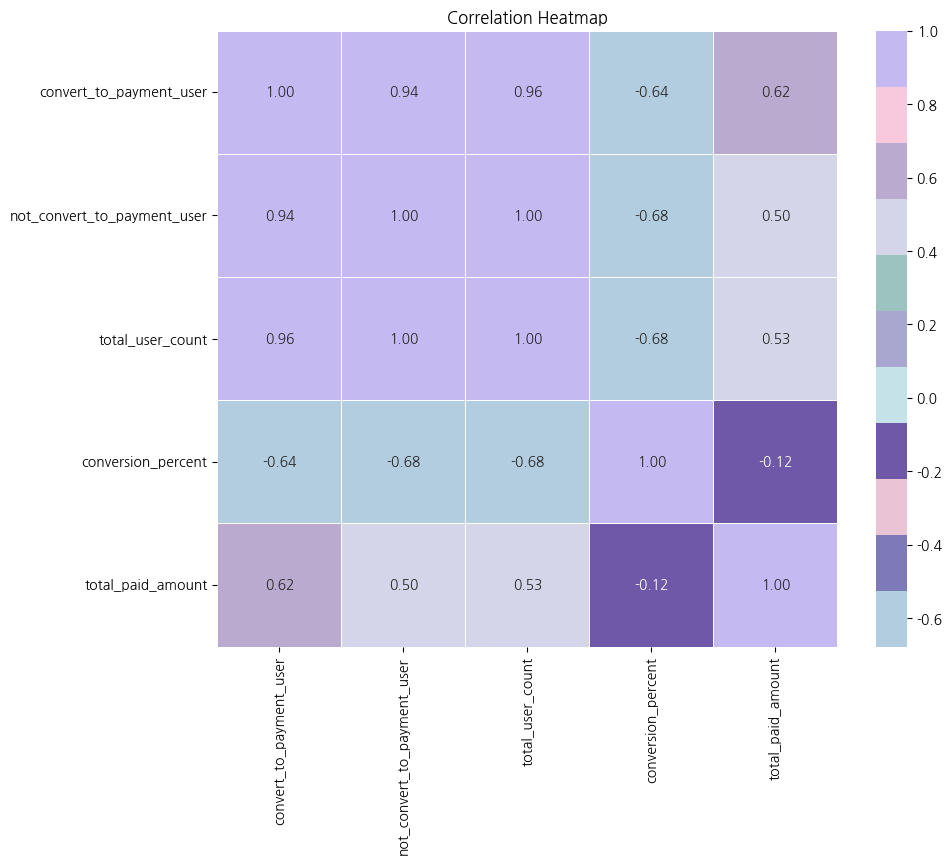

In [488]:
# 상관관계 그래프 그리기
# total_user_count가 25% 지점인 18.6을 초과하는 행만 추출하여 그래프를 그리기
free_lesson_conversion_df_graph = free_lesson_conversion_df[free_lesson_conversion_df['total_user_count'] > 18]

# 필요한 열 추출
selected_columns = ['convert_to_payment_user', 'not_convert_to_payment_user', 'total_user_count', 'conversion_percent', 'total_paid_amount']
free_lesson_conversion_df_selected = free_lesson_conversion_df[selected_columns]

# 상관관계 행렬 계산
correlation_matrix = free_lesson_conversion_df_selected.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap= palette, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### 결과
- enter_lesson_page에서 많이 재생된 top5 무료 레슨들의 전환율이 더 낮음.
- 유저들이 많이 찾는 레슨인만큼 레슨 자체의 질을 높일 것을 제안

#### 아래 코드는 실행시키지 않음

In [ ]:
# # lesson_id_counts_real_true의 count 컬럼의 이름을 not_convert_to_payment_user로 변경
# lesson_id_counts_real_true = lesson_id_counts_real_true.rename(columns={'count': 'not_convert_to_payment_user'})

# # lesson_id_counts의 count 컬럼 이름을 conver_to_payment_user로 변경
# lesson_id_counts = lesson_id_counts.rename(columns={'count': 'convert_to_payment_user'})

# # lesson_id를 기준으로 두 데이터를 합치기
# merged_lesson_id_counts = pd.merge(lesson_id_counts, lesson_id_counts_real_true, on='lesson_id', how='outer')

# # total_user_count 컬럼추가
# merged_lesson_id_counts['total_user_count'] = merged_lesson_id_counts['not_convert_to_payment_user'] + merged_lesson_id_counts['convert_to_payment_user']

# # 전환율 컬럼 추가. round(convert_to_payment_user / (not_conver_to_payment_user + convert_to_payment_user) * 100, 2)
# merged_lesson_id_counts['conversion_percent'] = round(
#     merged_lesson_id_counts['convert_to_payment_user'] / 
#     (merged_lesson_id_counts['not_convert_to_payment_user'] + merged_lesson_id_counts['convert_to_payment_user']) * 100, 2)

# # 전환율이 높은 레슨부터 내림차순
# free_lesson_conversion_df = merged_lesson_id_counts.sort_values(by='total_user_count', ascending=False).reset_index(drop=True)

# # 결과
# free_lesson_conversion_df

In [ ]:
# # 선형회귀

# import statsmodels.api as sm

# # 독립 변수와 종속 변수 설정
# X = free_lesson_conversion_df[['total_user_count']]
# y = free_lesson_conversion_df['conversion_percent']

# # 상수항 추가
# X = sm.add_constant(X)

# # 선형 회귀 모델 적합
# model = sm.OLS(y, X).fit()

# # 결과 출력
# print(model.summary())

In [ ]:
# # 정규성?

# # 잔차 계산
# residuals = model.resid

# # 히스토그램
# plt.hist(residuals, bins=20, edgecolor='black')
# plt.title('Residuals Histogram')
# plt.xlabel('Residuals')
# plt.ylabel('Frequency')
# plt.show()

# # Q-Q 플롯
# stats.probplot(residuals, dist="norm", plot=plt)
# plt.title('Q-Q Plot')
# plt.show()


In [ ]:
# complete_subscription.head()

In [ ]:
# # 각 user_id별로 lesson_id와 그 개수를 그룹화하여 추출
# positive_lessons_true_trial = enter_lesson_page_finalised_unique[
#     (enter_lesson_page_finalised_unique['user_id'].isin(positive_user_ids)) &
#     (enter_lesson_page_finalised_unique['is_trial'] == True)
# ]

# lesson_counts_for_paid_amount = positive_lessons_true_trial.groupby(['user_id', 'lesson_id']).size().reset_index(name='count')

# # lesson_counts_for_paid_amount를 user_id로 그룹화하여 각 user_id별로 lesson_id와 그 개수를 리스트로 저장
# grouped_lesson_counts_for_paid_amount = lesson_counts_for_paid_amount.groupby('user_id').apply(lambda x: x[['lesson_id', 'count']].values.tolist()).reset_index(name='lessons')

# # lessons 열을 lesson_id와 count 열로 분리
# grouped_lesson_counts_for_paid_amount[['lesson_ids', 'counts']] = grouped_lesson_counts_for_paid_amount['lessons'].apply(lambda x: pd.Series([list(zip(*x))[0], list(zip(*x))[1]]))

# # lessons 열 제거
# grouped_lesson_counts_for_paid_amount = grouped_lesson_counts_for_paid_amount.drop(columns=['lessons'])

# # lesson_ids의 개수를 세는 열 추가
# grouped_lesson_counts_for_paid_amount['lesson_ids_count'] = grouped_lesson_counts_for_paid_amount['lesson_ids'].apply(len)

# # counts 열 제거
# grouped_lesson_counts_for_paid_amount = grouped_lesson_counts_for_paid_amount.drop(columns=['counts'])

# # complete_subscription에서 각 user_id별로 paid_amount 값을 계산
# user_paid_amount = complete_subscription.groupby('user_id')['paid_amount'].sum().reset_index()

# # grouped_lesson_counts_for_paid_amount와 user_paid_amount를 병합하여 각 레슨별로 paid_amount 값을 계산
# merged_df = pd.merge(grouped_lesson_counts_for_paid_amount, user_paid_amount, on='user_id', how='left')

# # 각 lesson_id별로 paid_amount 값을 계산
# lesson_paid_amount = merged_df.explode('lesson_ids').groupby('lesson_ids')['paid_amount'].mean().reset_index()
# lesson_paid_amount.columns = ['lesson_id', 'total_paid_amount']

# # 결과 출력
# print("각 lesson_id가 이끌어낸 paid_amount 값:")
# lesson_paid_amount

In [ ]:
# # 기존 데이터에 합치기기
# free_lesson_conversion_df = pd.merge(free_lesson_conversion_df, lesson_paid_amount, on='lesson_id', how='outer')

# # paid_amount가가 높은 레슨부터 내림차순
# free_lesson_conversion_df = free_lesson_conversion_df.sort_values(by='total_paid_amount', ascending=False).reset_index(drop=True)

# free_lesson_conversion_df

In [ ]:
# # paid amount에 대한 선형회귀
# X = free_lesson_conversion_df[['conversion_percent']]
# y = free_lesson_conversion_df['total_paid_amount']

# # 상수항 추가
# X = sm.add_constant(X)

# # 선형 회귀 모델 적합
# model = sm.OLS(y, X).fit()

# # 결과 출력
# print(model.summary())

In [ ]:
# # 정규성?

# # 잔차 계산
# residuals = model.resid

# # 히스토그램
# plt.hist(residuals, bins=20, edgecolor='black')
# plt.title('Residuals Histogram')
# plt.xlabel('Residuals')
# plt.ylabel('Frequency')
# plt.show()

# # Q-Q 플롯
# stats.probplot(residuals, dist="norm", plot=plt)
# plt.title('Q-Q Plot')
# plt.show()
